## Team Eleven: Project One
- Behavioral Impact of Social Media Usage on Productivity and Engagement

Team 11 Contributors:
- Cameron Magor 
- Angelina Wright 
- Daena Wallace

# Description:
This project investigates the behavioral impact of social media usage, with a focus on how different factors such as device type, location, profession, and engagement levels influence productivity and social media addiction. By analyzing data related to user habits on various devices, locations, and professions, we aim to uncover insights into how specific behaviors and patterns contribute to productivity loss and social media addiction.

# Project Goals and Objectives:
Our primary goal is to analyze user data to identify patterns that could help explain the behavioral impact of social media usage. Specifically, we aim to understand how location, device type, profession, engagement levels and scroll rate contribute to addiction levels and productivity loss. Each question brings a different dimension to this analysis, helping us build a comprehensive understanding of the behavioral impacts of social media.

## Creating Dependencies and Data Path

In [169]:
# Import Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
import os
from pathlib import Path
import requests
import json
import kagglehub
from scipy.stats import linregress, pearsonr, ttest_ind, shapiro, levene
import scipy.stats as st
import seaborn as sns
import scipy.stats as stats
import seaborn as sns
import os


In [ ]:
#kaggle login
kagglehub.login() 

Kaggle credentials set.
Kaggle credentials successfully validated.


In [171]:
# # Download latest version
path = kagglehub.dataset_download("muhammadroshaanriaz/time-wasters-on-social-media")
print("Path to dataset files:", path)


Path to dataset files: C:\Users\info\.cache\kagglehub\datasets\muhammadroshaanriaz\time-wasters-on-social-media\versions\1


In [172]:
#File to load - paste path from above into file_to_load 
file_to_load = Path(r"C:\Users\info\Desktop\team_11project1\data\Cleaned_dataset.csv")


#Read data
mobile_usage_df = pd.read_csv(file_to_load)

mobile_usage_df


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,Device Type,OS,Watch Time,Self Control,Addiction Level,Current Activity,Connection Type
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Brazil,62963,True,False,Waiting Staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,Male,India,74254,True,True,Students,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,5:45 PM,10,0,At work,Mobile Data
996,997,40,Female,Pakistan,27006,False,False,Waiting Staff,Urban,Facebook,...,8,2,Boredom,Smartphone,MacOS,10:15 PM,10,0,At home,Mobile Data
997,998,27,Male,India,94218,True,True,Waiting Staff,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,10:15 PM,10,0,Commuting,Mobile Data
998,999,61,Male,Pakistan,85344,True,False,Students,Urban,YouTube,...,3,7,Procrastination,Smartphone,MacOS,10:15 PM,5,5,At work,Wi-Fi


## Data Clean Up

In [173]:
# Get info about total rows and columns
num_rows, num_columns = mobile_usage_df.shape

print(f"Total number of rows is: {num_rows}")
print(f"Total number of columns is: {num_columns}")

Total number of rows is: 1000
Total number of columns is: 31


In [174]:
# Get info about data
mobile_usage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

In [175]:
# Check for any null values
mobile_usage_df.isna().sum()

UserID                      0
Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
Device Type                 0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
Current Activity            0
Connection Type             0
dtype: int64

In [176]:
# Check for any duplicates
mobile_usage_df[mobile_usage_df.duplicated()]

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,Device Type,OS,Watch Time,Self Control,Addiction Level,Current Activity,Connection Type


In [177]:
# Fetch random rows
mobile_usage_df.sample(5)

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,Device Type,OS,Watch Time,Self Control,Addiction Level,Current Activity,Connection Type
779,780,64,Other,Japan,78394,True,False,Students,Rural,Facebook,...,8,2,Entertainment,Smartphone,iOS,2:00 PM,10,0,At school,Mobile Data
559,560,37,Male,Philippines,67498,True,False,Cashier,Urban,Facebook,...,9,1,Habit,Computer,Android,7:45 AM,10,0,At work,Mobile Data
913,914,20,Male,Vietnam,56609,True,True,Waiting Staff,Rural,Facebook,...,6,4,Entertainment,Computer,iOS,2:00 PM,8,2,At home,Mobile Data
59,60,53,Male,Japan,85428,True,False,Driver,Urban,TikTok,...,3,7,Habit,Smartphone,iOS,9:00 PM,5,5,At home,Mobile Data
768,769,56,Male,Philippines,91312,True,True,Students,Rural,Facebook,...,8,2,Habit,Smartphone,Windows,5:00 PM,10,0,At home,Mobile Data


In [178]:
mobile_usage_df.to_csv("Cleaned_dataset.csv")

In [179]:
#rename Barzil to Brazil in Location column and replace driver to Drive in the Profession column
mobile_usage_df["Location"] = mobile_usage_df["Location"].replace("Barzil", "Brazil")
mobile_usage_df["Profession"] = mobile_usage_df["Profession"].replace("driver", "Driver")
mobile_usage_df["Profession"] = mobile_usage_df["Profession"].replace("Waiting staff", "Waiting Staff")

In [180]:
#display columns
mobile_usage_df.columns

Index(['UserID', 'Age', 'Gender', 'Location', 'Income', 'Debt',
       'Owns Property', 'Profession', 'Demographics', 'Platform',
       'Total Time Spent', 'Number of Sessions', 'Video ID', 'Video Category',
       'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video',
       'Number of Videos Watched', 'Scroll Rate', 'Frequency',
       'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'Device Type', 'OS',
       'Watch Time', 'Self Control', 'Addiction Level', 'Current Activity',
       'Connection Type'],
      dtype='object')

In [181]:
#rename columns "CurrentActivity" and "ConnectionType"
mobile_usage_df = mobile_usage_df.rename(columns={
    "DeviceType": "Device Type",
    "CurrentActivity": "Current Activity",
    "ConnectionType": "Connection Type"
})

In [182]:
#display columns
mobile_usage_df.columns

Index(['UserID', 'Age', 'Gender', 'Location', 'Income', 'Debt',
       'Owns Property', 'Profession', 'Demographics', 'Platform',
       'Total Time Spent', 'Number of Sessions', 'Video ID', 'Video Category',
       'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video',
       'Number of Videos Watched', 'Scroll Rate', 'Frequency',
       'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'Device Type', 'OS',
       'Watch Time', 'Self Control', 'Addiction Level', 'Current Activity',
       'Connection Type'],
      dtype='object')

In [183]:
mobile_usage_df.to_csv("data/Cleaned_dataset.csv", index=False)
print(mobile_usage_df)

     UserID  Age  Gender       Location  Income   Debt  Owns Property  \
0         1   56    Male       Pakistan   82812   True           True   
1         2   46  Female         Mexico   27999  False           True   
2         3   32  Female  United States   42436  False           True   
3         4   60    Male         Brazil   62963   True          False   
4         5   25    Male       Pakistan   22096  False           True   
..      ...  ...     ...            ...     ...    ...            ...   
995     996   22    Male          India   74254   True           True   
996     997   40  Female       Pakistan   27006  False          False   
997     998   27    Male          India   94218   True           True   
998     999   61    Male       Pakistan   85344   True          False   
999    1000   19    Male          India   53840   True           True   

        Profession Demographics   Platform  ...  ProductivityLoss  \
0         Engineer        Rural  Instagram  ...       

In [184]:
#file to load
cleaned_dataset_path = Path("data/Cleaned_dataset.csv")

#read the file 
cleaned_dataset_df = pd.read_csv(cleaned_dataset_path, index_col=False)
cleaned_dataset_df

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,Device Type,OS,Watch Time,Self Control,Addiction Level,Current Activity,Connection Type
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Brazil,62963,True,False,Waiting Staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,Male,India,74254,True,True,Students,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,5:45 PM,10,0,At work,Mobile Data
996,997,40,Female,Pakistan,27006,False,False,Waiting Staff,Urban,Facebook,...,8,2,Boredom,Smartphone,MacOS,10:15 PM,10,0,At home,Mobile Data
997,998,27,Male,India,94218,True,True,Waiting Staff,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,10:15 PM,10,0,Commuting,Mobile Data
998,999,61,Male,Pakistan,85344,True,False,Students,Urban,YouTube,...,3,7,Procrastination,Smartphone,MacOS,10:15 PM,5,5,At work,Wi-Fi


In [185]:
# Get info about total rows and columns
num_rows, num_columns = cleaned_dataset_df.shape

print(f"Total number of rows is: {num_rows}")
print(f"Total number of columns is: {num_columns}")

Total number of rows is: 1000
Total number of columns is: 31


In [186]:
# Check the data types of the dataframe
cleaned_dataset_df.dtypes

UserID                       int64
Age                          int64
Gender                      object
Location                    object
Income                       int64
Debt                          bool
Owns Property                 bool
Profession                  object
Demographics                object
Platform                    object
Total Time Spent             int64
Number of Sessions           int64
Video ID                     int64
Video Category              object
Video Length                 int64
Engagement                   int64
Importance Score             int64
Time Spent On Video          int64
Number of Videos Watched     int64
Scroll Rate                  int64
Frequency                   object
ProductivityLoss             int64
Satisfaction                 int64
Watch Reason                object
Device Type                 object
OS                          object
Watch Time                  object
Self Control                 int64
Addiction Level     

In [187]:
# Display the info in the dataframe

cleaned_dataset_df.describe()

,UserID,Age,Income,Total Time Spent,Number of Sessions,Video ID,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,ProductivityLoss,Satisfaction,Self Control,Addiction Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.986000,59524.213000,151.406000,10.013000,4891.738000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000,5.136000,4.864000,7.094000,2.906000
std,288.819436,13.497852,23736.212925,83.952637,5.380314,2853.144258,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798,2.122265,2.122265,2.058495,2.058495
min,1.000000,18.000000,20138.000000,10.000000,1.000000,11.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,250.750000,29.000000,38675.250000,78.000000,6.000000,2542.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000,3.000000,4.000000,5.000000,2.000000
50%,500.500000,42.000000,58805.000000,152.000000,10.000000,4720.500000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000,5.000000,5.000000,7.000000,3.000000
75%,750.250000,52.000000,79792.250000,223.000000,15.000000,7346.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000,6.000000,7.000000,8.000000,5.000000
max,1000.000000,64.000000,99676.000000,298.000000,19.000000,9997.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000,9.000000,9.000000,10.000000,7.000000


In [188]:
#get gender count
gender_count = cleaned_dataset_df["Gender"].value_counts()
gender_count

Gender
Male      514
Female    322
Other     164
Name: count, dtype: int64

In [189]:
#average of addication levels
avg_addication_lvls = cleaned_dataset_df.groupby("Location")["Addiction Level"].mean().round(0)
avg_addication_lvls

Location
Brazil           3.0
Germany          3.0
India            3.0
Indonesia        3.0
Japan            3.0
Mexico           3.0
Pakistan         3.0
Philippines      3.0
United States    3.0
Vietnam          3.0
Name: Addiction Level, dtype: float64

In [190]:
#Are addiction levels higher in certain locations?

location_count = cleaned_dataset_df["Location"].value_counts()
location_count

Location
India            228
United States    174
Vietnam           82
Brazil            78
Philippines       78
Indonesia         77
Pakistan          76
Japan             75
Mexico            73
Germany           59
Name: count, dtype: int64

## Are addiction levels higher in certain locations?

In [191]:

addiction_lvl_df = cleaned_dataset_df[["Location","Addiction Level"]]
addiction_lvl_df

,Location,Addiction Level
0,Pakistan,5
1,Mexico,3
2,United States,2
3,Brazil,5
4,Pakistan,0
...,...,...
995,India,0
996,Pakistan,0
997,India,0
998,Pakistan,5


In [192]:
#create bar plot to show count of locations
location_count_df  = pd.DataFrame(location_count).reset_index()
location_count_df

,Location,count
0,India,228
1,United States,174
2,Vietnam,82
3,Brazil,78
4,Philippines,78
5,Indonesia,77
6,Pakistan,76
7,Japan,75
8,Mexico,73
9,Germany,59


In [193]:
# Group by Addiction Level only and calculate the total count across all locations
addiction_level_counts = cleaned_dataset_df.groupby("Addiction Level").size()

# Display the result
addiction_level_counts

Addiction Level
0    180
1     60
2    248
3    159
4     36
5    228
6     34
7     55
dtype: int64

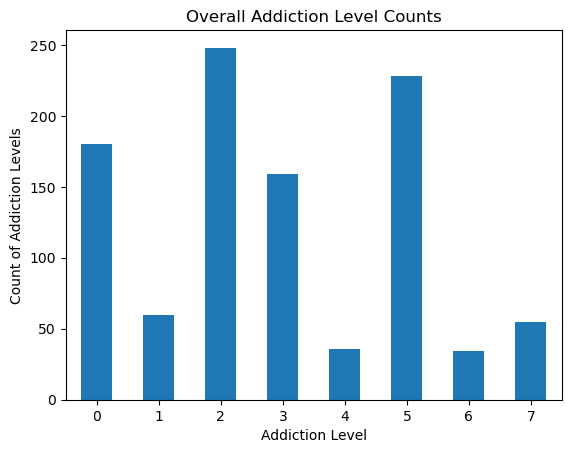

In [ ]:
# Plot the counts of each addiction level
addiction_level_counts.plot(kind="bar")
plt.title("Overall Addiction Level Counts")
plt.xlabel("Addiction Level")
plt.ylabel("Count of Addiction Levels")
plt.xticks(rotation=0) 
plt.show()

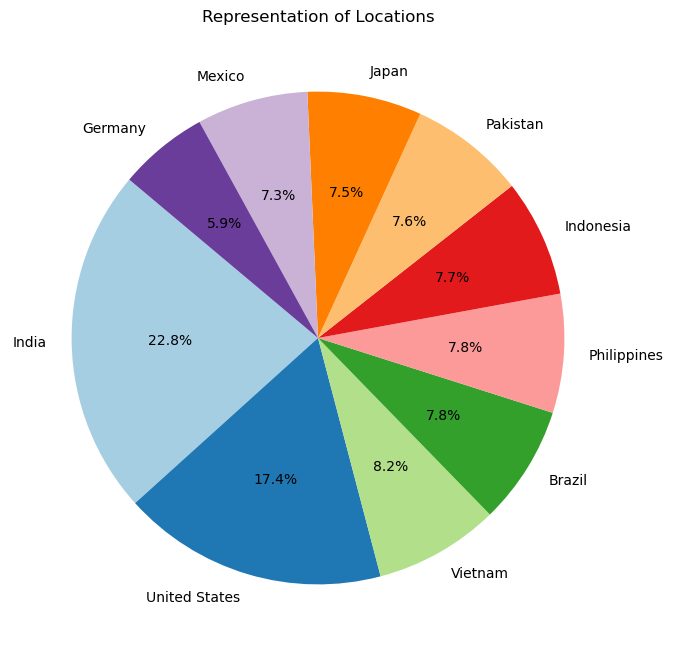

In [ ]:
##############---USED
location_counts = cleaned_dataset_df['Location'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Representation of Locations")
plt.show()

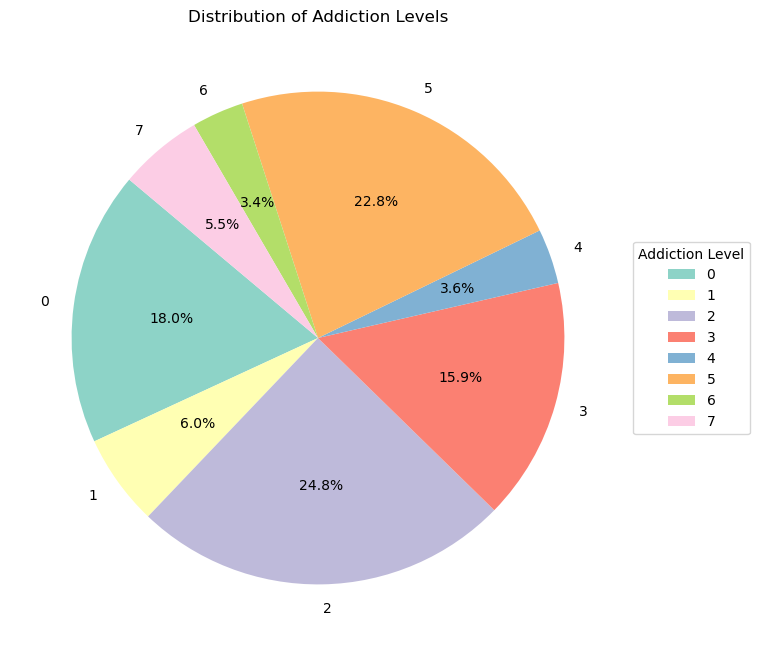

In [ ]:
# Convert addiction_level_totals to an array for plt.pie compatibility
values = addiction_level_counts.values  # Get the values as an array
labels = addiction_level_counts.index  # Get the labels from the index

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
# Add the legend
plt.legend(
    title="Addiction Level",
    bbox_to_anchor=(1, 0.5),  # Positioning the legend outside the pie chart on the right
    loc="center left"
)

# Add a title
plt.title("Distribution of Addiction Levels")
plt.show()

In [ ]:
 #group cleaned_dataset_df by "Location", "Addiction Level", .size() counts the number of "Addiction Level" instances in each "Location", .unstack() changes Series to DataFrame where "Addiction Level" is columns and "Location" is rows, fill_value=0) replaces Null values with 0
#addiction_lvl_location = cleaned_dataset_df.groupby(["Addiction Level", "Location"]).size().unstack
addiction_lvl_location = cleaned_dataset_df.groupby(["Location", "Addiction Level"]).size().unstack(fill_value=0)
addiction_lvl_location

Addiction Level,0,1,2,3,4,5,6,7
Location,,,,,,,,
Brazil,6,3,16,17,2,29,3,2
Germany,12,2,8,13,2,15,4,3
India,34,17,60,37,10,50,9,11
Indonesia,17,3,22,8,2,18,4,3
Japan,14,9,24,7,0,16,2,3
Mexico,15,4,17,10,3,16,3,5
Pakistan,19,3,18,11,5,19,0,1
Philippines,12,3,24,15,1,14,3,6
United States,29,12,43,27,8,34,4,17


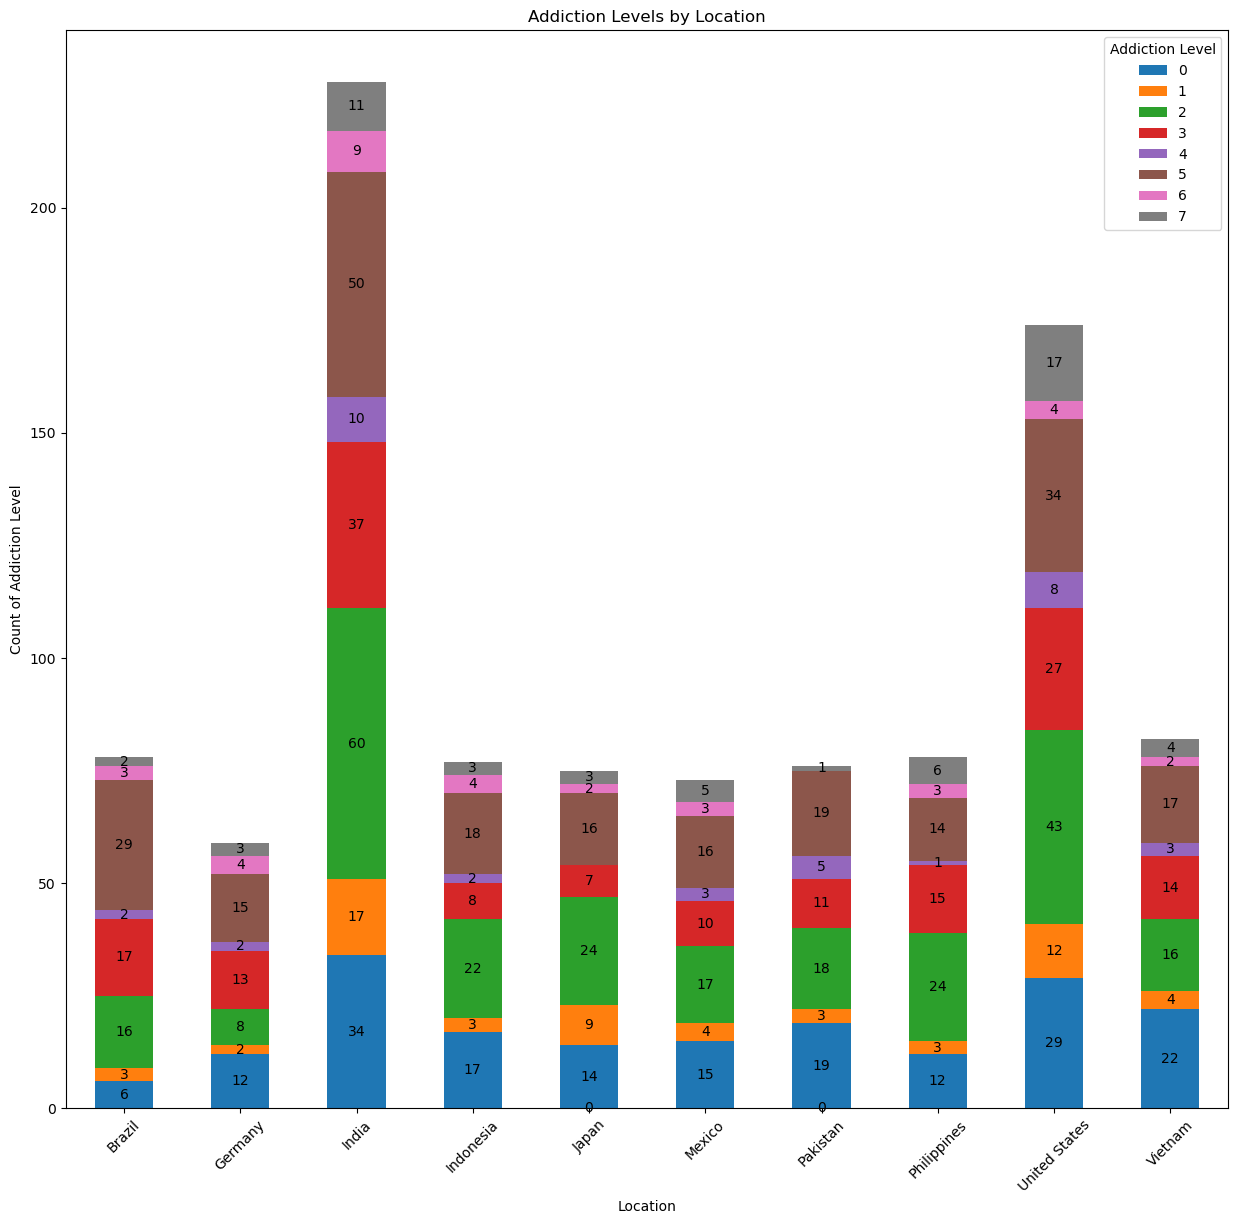

In [ ]:
#create stacked bar chart
ax = addiction_lvl_location.plot(kind="bar", stacked=True, figsize=(15, 14))
plt.ylabel("Count of Addiction Level")
plt.xticks(rotation=45) 
plt.title("Addiction Levels by Location")

#add values on top of each category in the bar chart
for container in ax.containers:
    #add the labels for each segment of the bar
    ax.bar_label(container, label_type="center", fmt='%.0f')  # Center the labels within each section

plt.show()

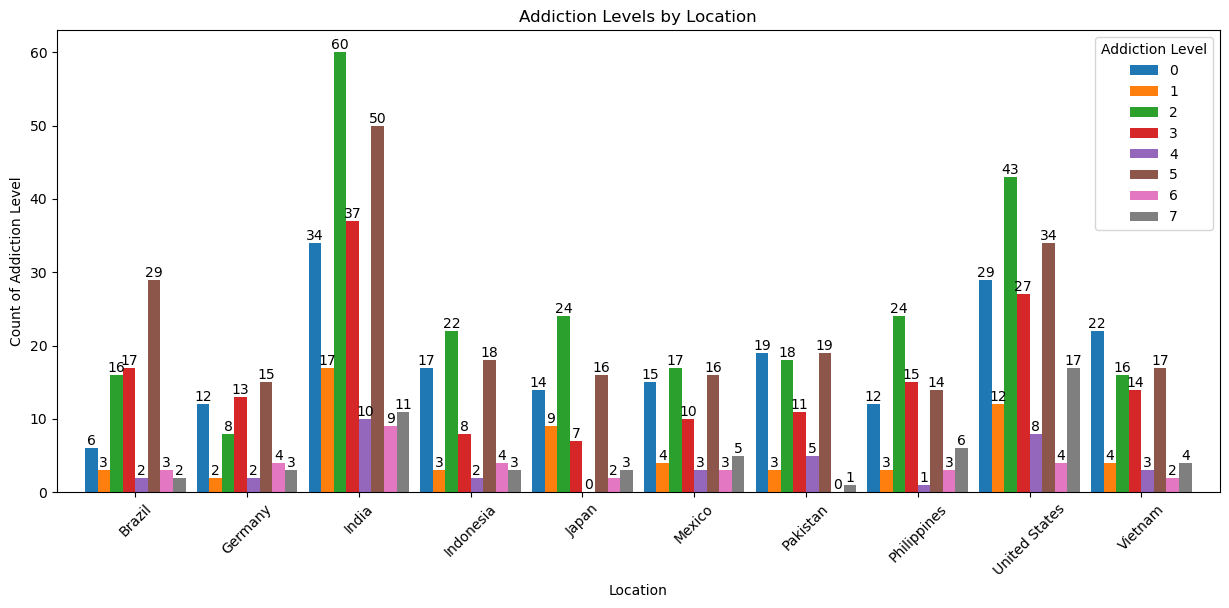

In [199]:
#addiction level by location 

# Create bar chart and store the plot in ax
ax = addiction_lvl_location.plot(kind="bar", figsize=(15, 6), width=0.9)
plt.title("Addiction Levels by Location")
plt.xlabel("Location")
plt.ylabel("Count of Addiction Level")
plt.xticks(rotation=45) 
plt.legend(title="Addiction Level")

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type="edge", fmt='%.0f')  # '%.0f' format for integer values

plt.show()

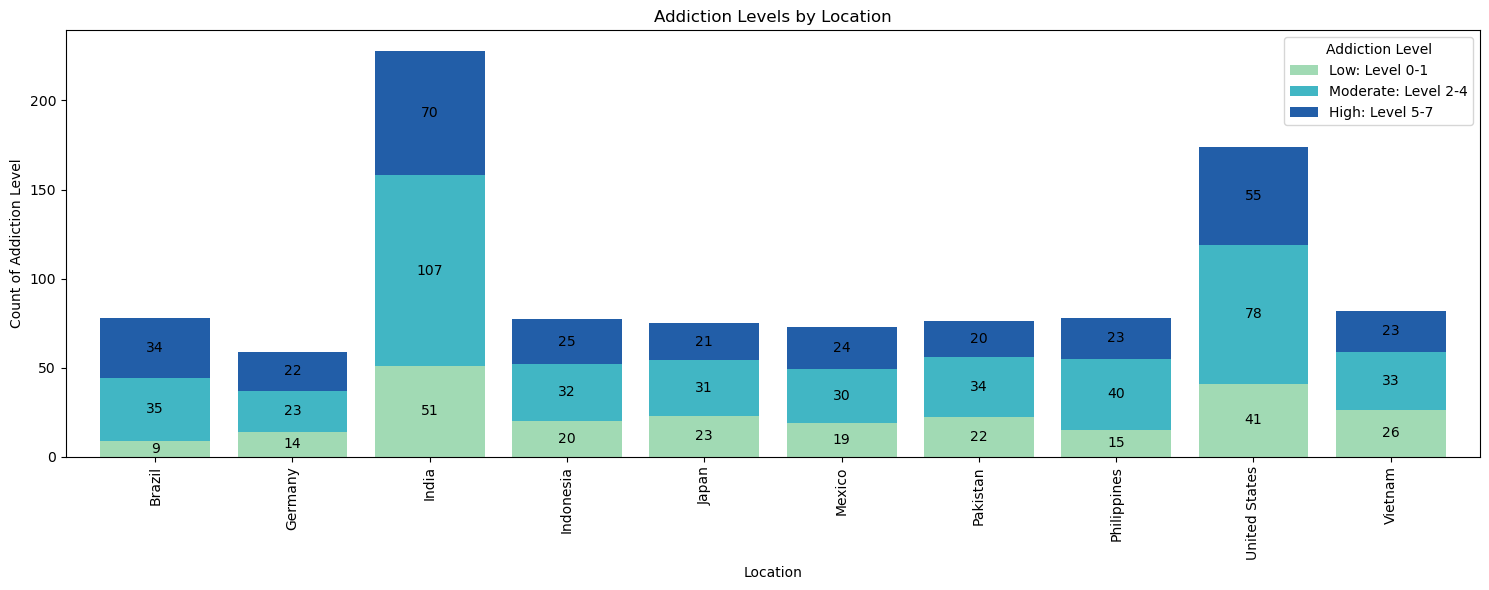

In [200]:
##############---USED

#define the new categories
low_levels = addiction_lvl_location[[0, 1]].sum(axis=1)
moderate_levels = addiction_lvl_location[[2, 3, 4]].sum(axis=1)
high_levels = addiction_lvl_location[[5, 6, 7]].sum(axis=1)

#create a new DataFrame with the grouped levels
grouped_addiction_df = pd.DataFrame({
    'Low: Level 0-1': low_levels,
    'Moderate: Level 2-4': moderate_levels,
    'High: Level 5-7': high_levels
})

#plot the data as a stacked bar chart
ax = grouped_addiction_df.plot(kind="bar", stacked=True, color=['#a1dab4', '#41b6c4', '#225ea8'], width=0.8, figsize=(15, 6))

# Add labels and title
plt.ylabel("Count of Addiction Level")
plt.xlabel("Location")
plt.title("Addiction Levels by Location")
plt.xticks(rotation=90)
plt.legend(title="Addiction Level")

#add values on top of each category in the bar chart
for container in ax.containers:
    #add the labels for each segment of the bar
    ax.bar_label(container, label_type="center", fmt='%.0f')  # Center the labels within each section

#show the plot
plt.tight_layout()
plt.show()

In [201]:
#addiction level by location 

#group cleaned_dataset_df by "Addiction Level", "Location", .size() counts the number of "Location" instances in each "Addiction Level", .unstack() changes Series to DataFrame where "Addiction Level" is columns and "Location" is rows, fill_value=0) replaces Null values with 0
addiction_lvl = cleaned_dataset_df.groupby(["Addiction Level", "Location"]).size().unstack(fill_value=0)
addiction_lvl

Location,Brazil,Germany,India,Indonesia,Japan,Mexico,Pakistan,Philippines,United States,Vietnam
Addiction Level,,,,,,,,,,
0,6,12,34,17,14,15,19,12,29,22
1,3,2,17,3,9,4,3,3,12,4
2,16,8,60,22,24,17,18,24,43,16
3,17,13,37,8,7,10,11,15,27,14
4,2,2,10,2,0,3,5,1,8,3
5,29,15,50,18,16,16,19,14,34,17
6,3,4,9,4,2,3,0,3,4,2
7,2,3,11,3,3,5,1,6,17,4


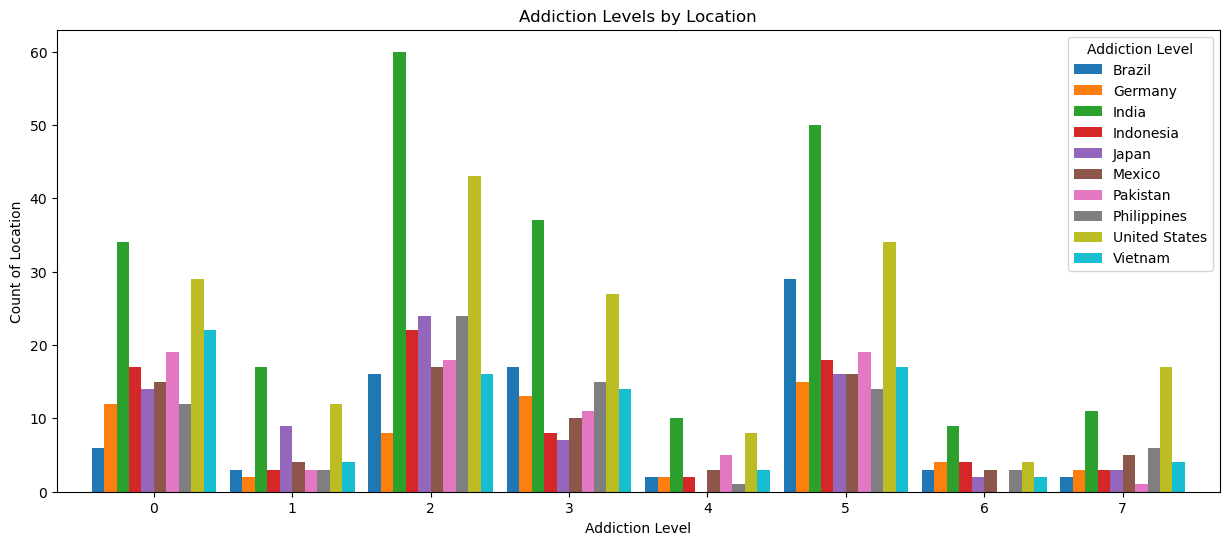

In [202]:
#addiction level by location 

#create bar chart
addiction_lvl.plot(kind="bar", figsize=(15, 6),width=0.9)
plt.title("Addiction Levels by Location")
plt.xlabel("Addiction Level")
plt.ylabel("Count of Location")
plt.xticks(rotation=0) 
plt.legend(title="Addiction Level")
plt.show()

In [203]:
#addiction level vs device type

#group data by "Device Type" and "Addiction Level", and unstack Addiction Level for multi-level columns
addiction_lvl_device_df = cleaned_dataset_df.groupby(["Device Type", "Addiction Level"]).size().unstack(level=1, fill_value=0)
addiction_lvl_device_df



Addiction Level,0,1,2,3,4,5,6,7
Device Type,,,,,,,,
Computer,22,6,41,17,4,33,3,6
Smartphone,108,38,149,92,19,137,17,25
Tablet,50,16,58,50,13,58,14,24


In [204]:

#calculate the count of addiction levels by location and device type
addiction_by_device_location = cleaned_dataset_df.groupby(["Location", "Device Type", "Addiction Level"]).size().unstack(fill_value=0)
device_types = cleaned_dataset_df["Device Type"].unique()
addiction_by_device_location

Addiction Level             0   1   2   3  4   5  6  7
Location      Device Type                             
Brazil        Computer      1   1   3   2  0   3  0  0
              Smartphone    3   2  11  12  0  18  2  1
              Tablet        2   0   2   3  2   8  1  1
Germany       Computer      0   0   2   0  0   0  0  0
              Smartphone   10   2   3   7  1   8  1  1
              Tablet        2   0   3   6  1   7  3  2
India         Computer      5   1   7   4  1   6  2  0
              Smartphone   22  12  42  20  5  30  5  5
              Tablet        7   4  11  13  4  14  2  6
Indonesia     Computer      3   0   7   2  0   6  1  0
              Smartphone    7   2   7   5  1  10  1  1
              Tablet        7   1   8   1  1   2  2  2
Japan         Computer      1   1   2   0  0   2  0  1
              Smartphone   10   8  16   6  0   8  1  1
              Tablet        3   0   6   1  0   6  1  1
Mexico        Computer      2   1   4   1  1   3  0  1
              Smartphone    8   1  10   5  2  10  2  1
              Tablet        5   2   3   4  0   3  1  3
Pakistan      Computer      0   0   4   2  0   4  0  0
              Smartphone   12   0  13   5  4  11  0  1
              Tablet        7   3   1   4  1   4  0  0
Philippines   Computer      3   0   3   2  0   2  0  0
              Smartphone    4   2  15   9  1  11  1  5
              Tablet        5   1   6   4  0   1  2  1
United States Computer      5   2   4   0  2   6  0  4
              Smartphone   20   7  26  18  3  22  3  6
              Tablet        4   3  13   9  3   6  1  7
Vietnam       Computer      2   0   5   4  0   1  0  0
              Smartphone   12   2   6   5  2   9  1  3
              Tablet        8   2   5   5  1   7  1  1

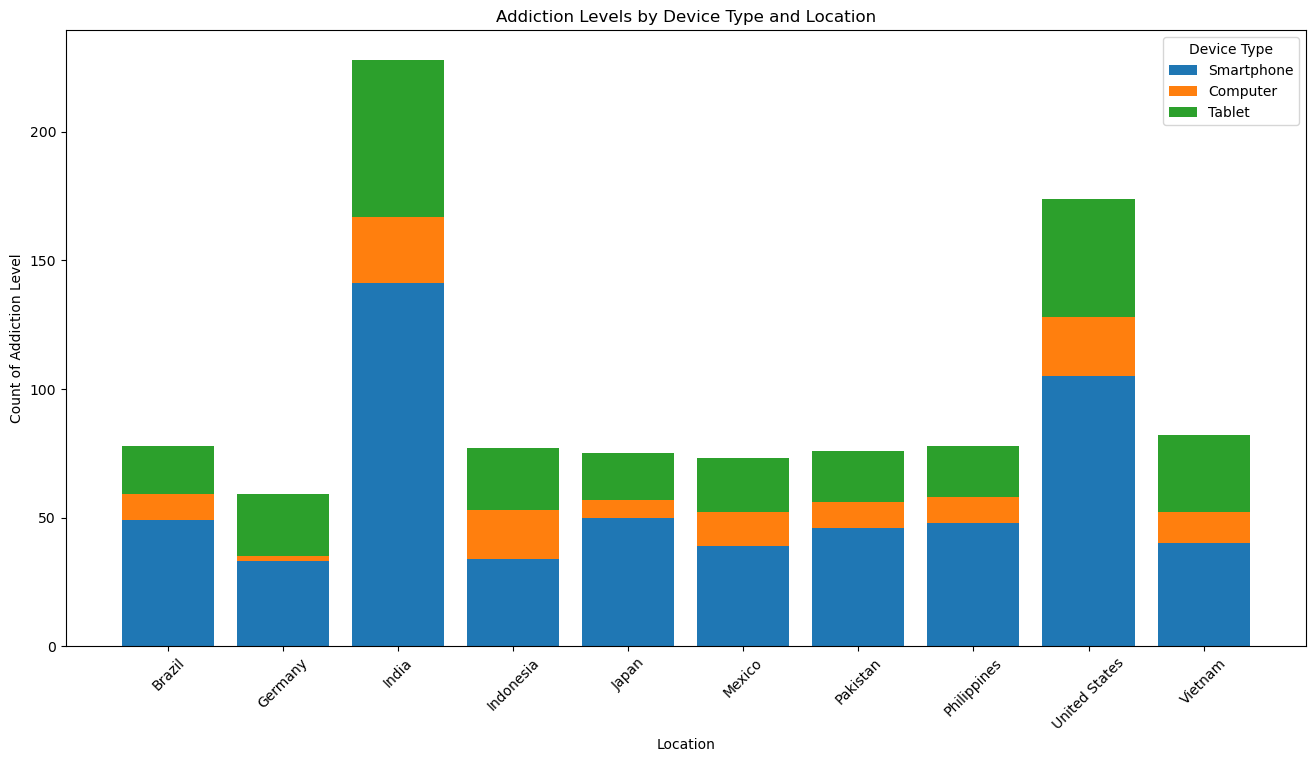

In [205]:
#reset the index to make 'Location' a column
addiction_by_device_location = addiction_by_device_location.reset_index()

#create the stacked bar chart
fig, ax = plt.subplots(figsize=(16, 8))

#initialize the bottom array for stacking bars
bottom = np.zeros(len(addiction_by_device_location["Location"].unique()))

#loop through each device type and add a stack for each addiction level
for device_type in device_types:
    #filter data for the current device type, select only numeric columns for summing counts by location
    counts = addiction_by_device_location[addiction_by_device_location["Device Type"] == device_type].set_index("Location").select_dtypes(include="number").sum(axis=1)
    ax.bar(counts.index, counts.values, label=device_type, bottom=bottom)
    #update bottom for stacking
    bottom += counts.values  

#add labels and title
ax.set_title("Addiction Levels by Device Type and Location")
ax.set_xlabel("Location")
ax.set_ylabel("Count of Addiction Level")
plt.xticks(rotation=45)
ax.legend(title="Device Type")
plt.show()

In [206]:
#group by Location, Profession, and Addiction Level, and get the count for each combination
addiction_by_location_profession = cleaned_dataset_df.groupby(["Location", "Profession", "Addiction Level"]).size().unstack(fill_value=0)
addiction_by_location_profession

Addiction Level         0  1  2  3  4  5  6  7
Location Profession                           
Brazil   Artist         1  0  0  2  0  2  0  0
         Cashier        0  0  1  1  0  2  1  0
         Driver         0  0  2  4  1  2  0  0
         Engineer       0  1  0  3  0  2  0  0
         Labor/Worker   3  0  3  1  1  9  0  1
...                    .. .. .. .. .. .. .. ..
Vietnam  Labor/Worker   4  1  3  4  1  2  1  0
         Manager        2  0  2  1  1  2  0  0
         Students       8  0  4  5  1  0  0  2
         Teacher        0  1  0  0  0  1  0  0
         Waiting Staff  4  1  3  3  0  4  0  1

[90 rows x 8 columns]

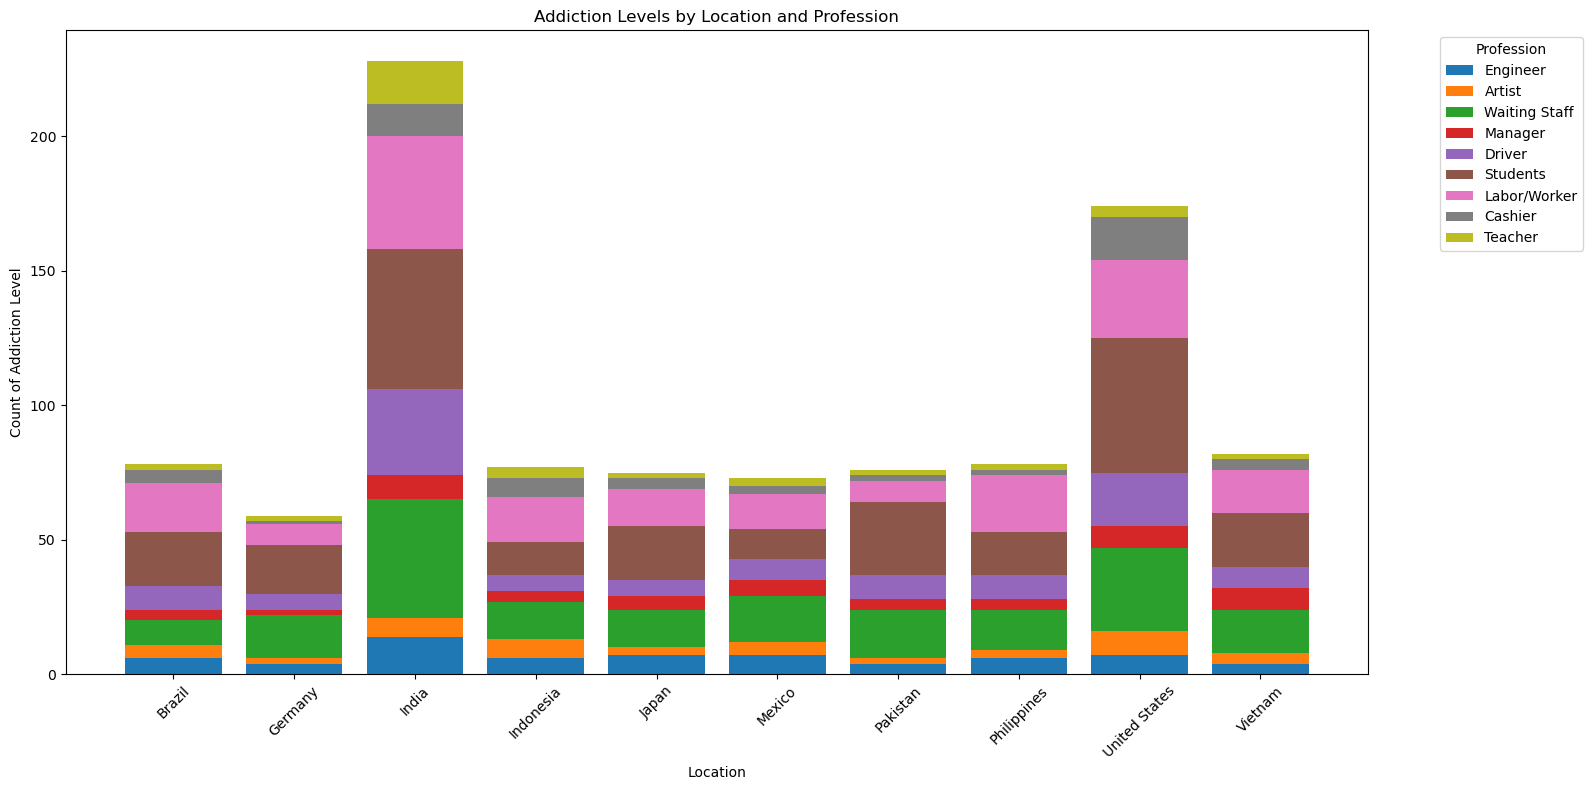

In [207]:
#reset the index to make 'Location' and 'Profession' columns
addiction_by_location_profession = addiction_by_location_profession.reset_index()

#list of unique locations and professions for the loop
locations = cleaned_dataset_df["Location"].unique()
professions = cleaned_dataset_df["Profession"].unique()

#create the stacked bar chart for each location, grouped by profession
fig, ax = plt.subplots(figsize=(16, 8))

#initialize the bottom array for stacking bars
bottom = np.zeros(len(addiction_by_location_profession["Location"].unique()))

#loop through each profession and add a stack for each addiction level
for profession in professions:
    #filter data for the current profession and sum counts by location
    counts = addiction_by_location_profession[addiction_by_location_profession["Profession"] == profession].set_index("Location").select_dtypes(include="number").sum(axis=1)
    ax.bar(counts.index, counts.values, label=profession, bottom=bottom)
    #update bottom for stacking
    bottom += counts.values  

#ad labels and title
ax.set_title("Addiction Levels by Location and Profession")
ax.set_xlabel("Location")
ax.set_ylabel("Count of Addiction Level")
plt.xticks(rotation=45)
ax.legend(title="Profession", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

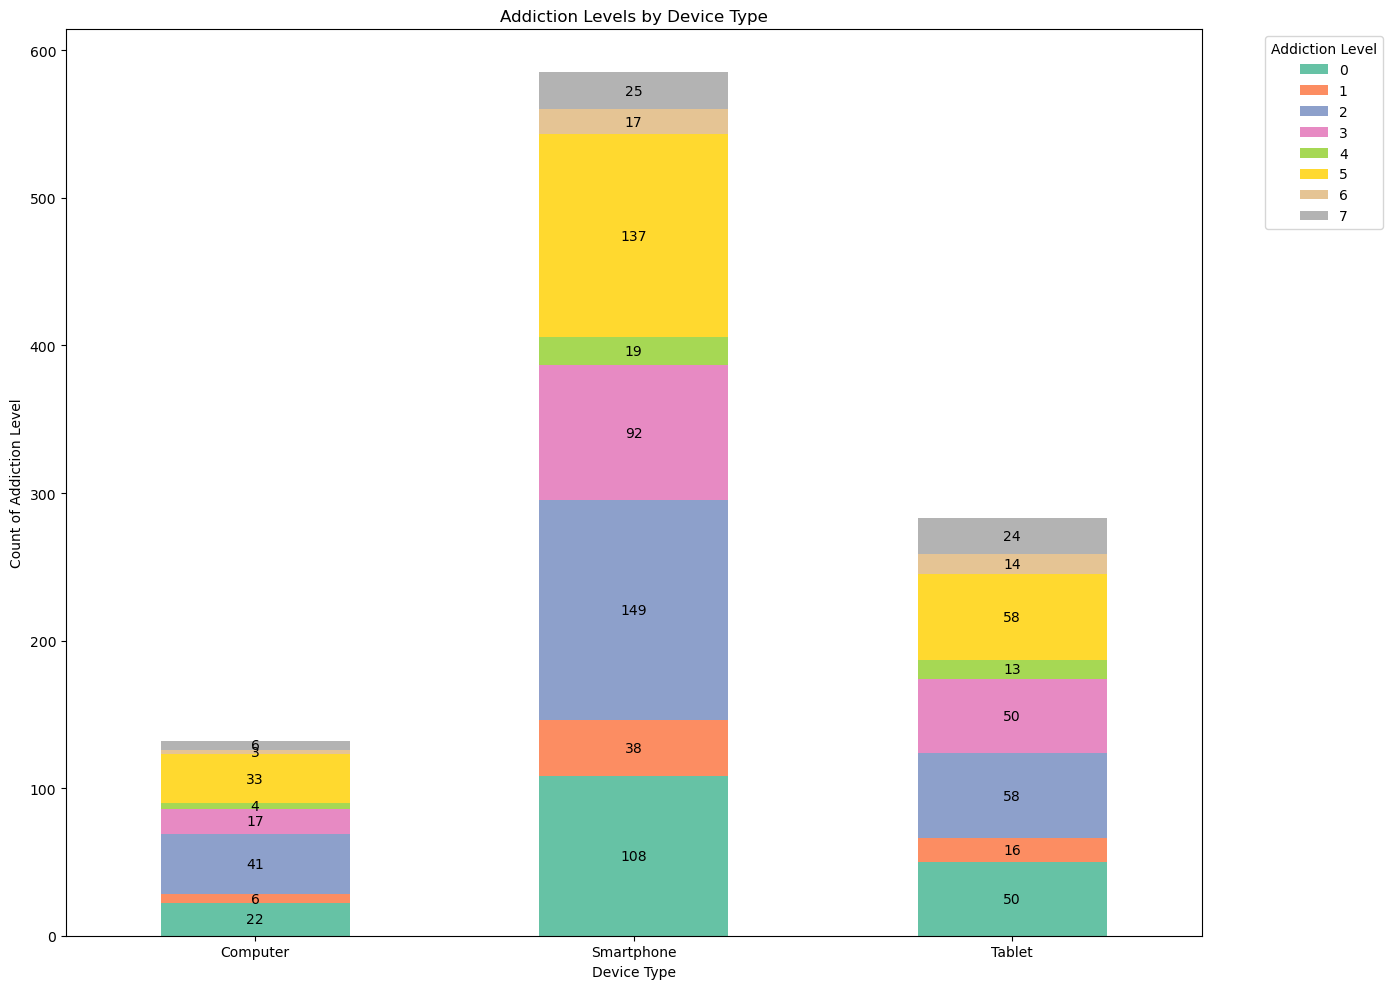

In [ ]:
# Set up the plot
#plt.figure(figsize=(18, 14))
ax = addiction_lvl_device_df.plot(kind="bar", stacked=True, colormap="Set2", figsize=(14, 10))

# Set labels and title
plt.title("Addiction Levels by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Count of Addiction Level")
plt.xticks(rotation=0)
plt.legend(title="Addiction Level", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add count labels on each stacked segment
for container in ax.containers:
    ax.bar_label(container, label_type="center", fmt='%.0f')  # Add labels in the center of each bar segment

plt.tight_layout()
plt.show()

In [ ]:

addiction_lvl_profession_df = cleaned_dataset_df.groupby(["Profession", "Addiction Level"]).size().unstack(level=1, fill_value=0)
addiction_lvl_profession_df


Addiction Level,0,1,2,3,4,5,6,7
Profession,,,,,,,,
Artist,9,4,11,7,1,12,2,1
Cashier,10,3,15,9,4,9,3,3
Driver,17,6,27,19,4,32,4,4
Engineer,12,2,17,10,0,22,2,0
Labor/Worker,32,9,51,28,11,39,8,8
Manager,7,4,13,9,1,17,2,1
Students,42,17,63,31,10,55,6,22
Teacher,8,4,9,5,1,8,0,4
Waiting Staff,43,11,42,41,4,34,7,12


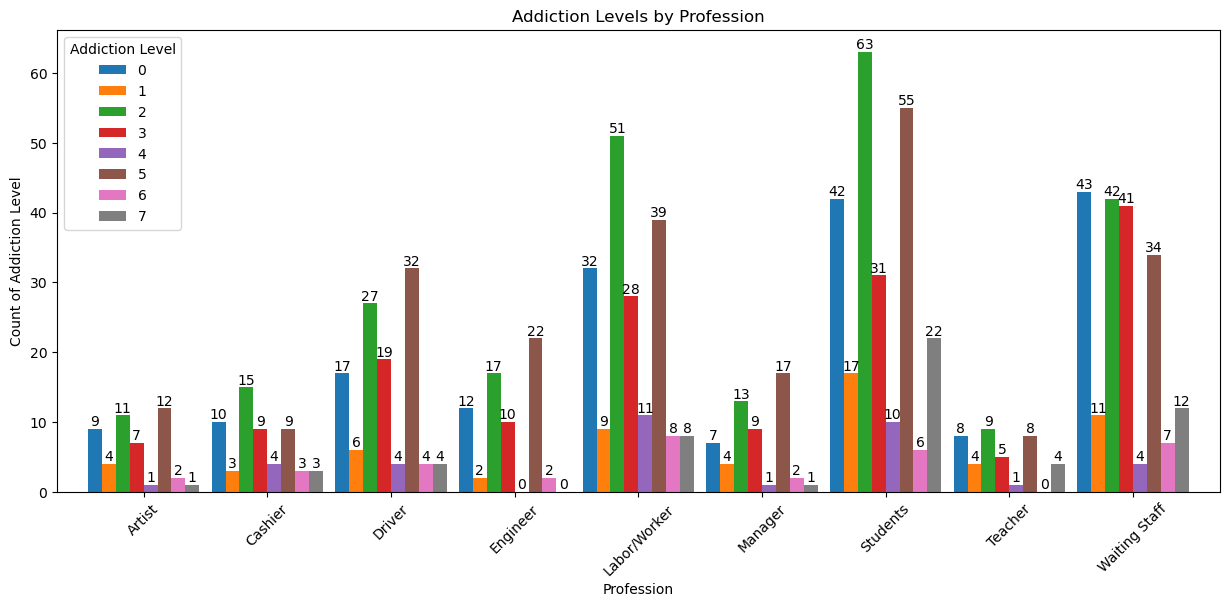

In [ ]:
# Create bar chart and store the plot in ax
ax = addiction_lvl_profession_df.plot(kind="bar", figsize=(15, 6), width=0.9)
plt.title("Addiction Levels by Profession")
plt.xlabel("Profession")
plt.ylabel("Count of Addiction Level")
plt.xticks(rotation=45) 
plt.legend(title="Addiction Level")

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type="edge", fmt='%.0f')  # '%.0f' format for integer values

plt.show()

The correlation coefficient between addiction level ands self control is -1.0


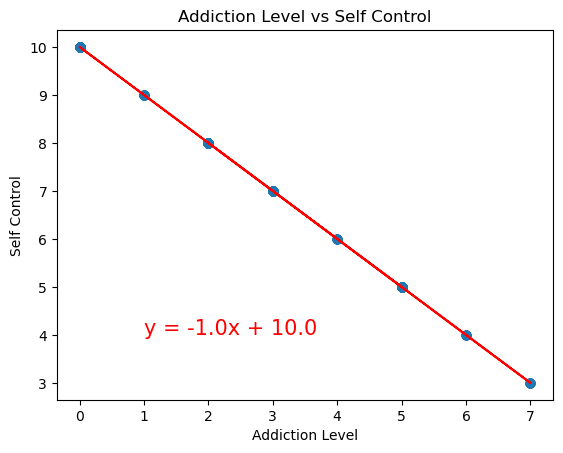

In [ ]:
#define x and y values
x_values = cleaned_dataset_df["Addiction Level"] 
y_values = cleaned_dataset_df["Self Control"]
#linear regression using linregress function 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#calculate y values for regression line
regress_values = x_values * slope + intercept

#equation of the regression line as a string
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

#scatter plot 
plt.scatter(x_values,y_values)

#plot x_values and regress_values and the regression line in red
plt.plot(x_values, regress_values, "r-")

#adds the line_eq string as a text annotation to the plot 
plt.annotate(line_eq,(1,4),fontsize=15,color="red")
plt.xlabel("Addiction Level") 
plt.ylabel("Self Control")
plt.title("Addiction Level vs Self Control")
print(f"The correlation coefficient between addiction level ands self control is {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.show()





## Is there a relationship between profession and device type?

In [212]:

profession_count = cleaned_dataset_df["Profession"].value_counts()
profession_count

Profession
Students         246
Waiting Staff    194
Labor/Worker     186
Driver           113
Engineer          65
Cashier           56
Manager           54
Artist            47
Teacher           39
Name: count, dtype: int64

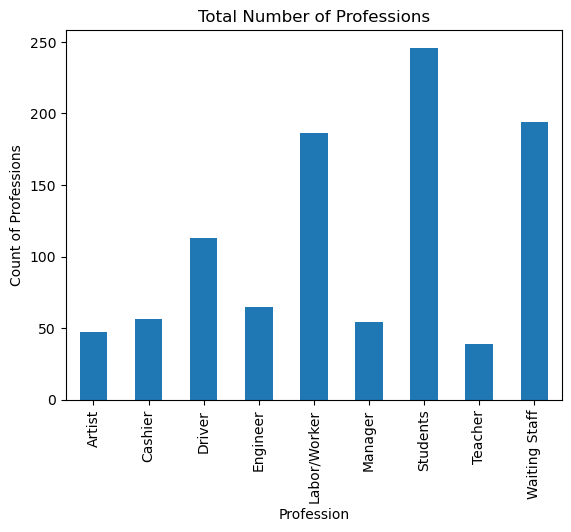

In [213]:

#create bar plot to show count of locations
profession_count_df  = pd.DataFrame(profession_count).reset_index()
profession_count_df

profession_count_df = profession_count_df.sort_values(by="Profession")

profession_count_df.columns = ["Profession", "# of Professions"]
profession_count_df
pd_bar_plot = profession_count_df.plot(x="Profession", y="# of Professions", kind="bar", legend=False)
pd_bar_plot.set_ylabel("Count of Professions")
plt.title("Total Number of Professions")
plt.show()

In [214]:

device_type_count = cleaned_dataset_df["Device Type"].value_counts()
device_type_count

Device Type
Smartphone    585
Tablet        283
Computer      132
Name: count, dtype: int64

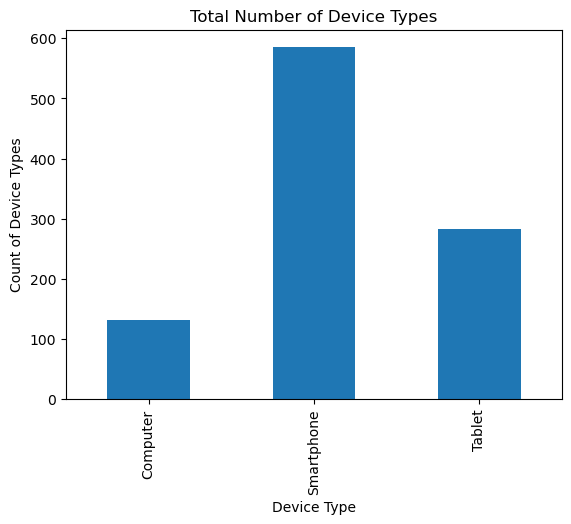

In [215]:

#create bar plot to show count of locations
device_type_count_df  = pd.DataFrame(device_type_count).reset_index()
device_type_count_df

device_type_count_df.columns = ["Device Type", "# of Device Types"]
device_type_count_df

device_type_count_df = device_type_count_df.sort_values(by="Device Type")

pd_bar_plot = device_type_count_df.plot(x="Device Type", y="# of Device Types", kind="bar", legend=False)
pd_bar_plot.set_ylabel("Count of Device Types")
plt.title("Total Number of Device Types")
plt.show()

In [216]:
#profession by device type

device_type_df = cleaned_dataset_df[["Device Type","Profession"]]
device_type_df

device_profession_counts_df = device_type_df.groupby(["Profession", "Device Type"]).size().unstack()
device_profession_counts_df

Device Type,Computer,Smartphone,Tablet
Profession,,,
Artist,9,25,13
Cashier,15,23,18
Driver,11,70,32
Engineer,10,39,16
Labor/Worker,14,112,60
Manager,8,33,13
Students,34,147,65
Teacher,7,22,10
Waiting Staff,24,114,56


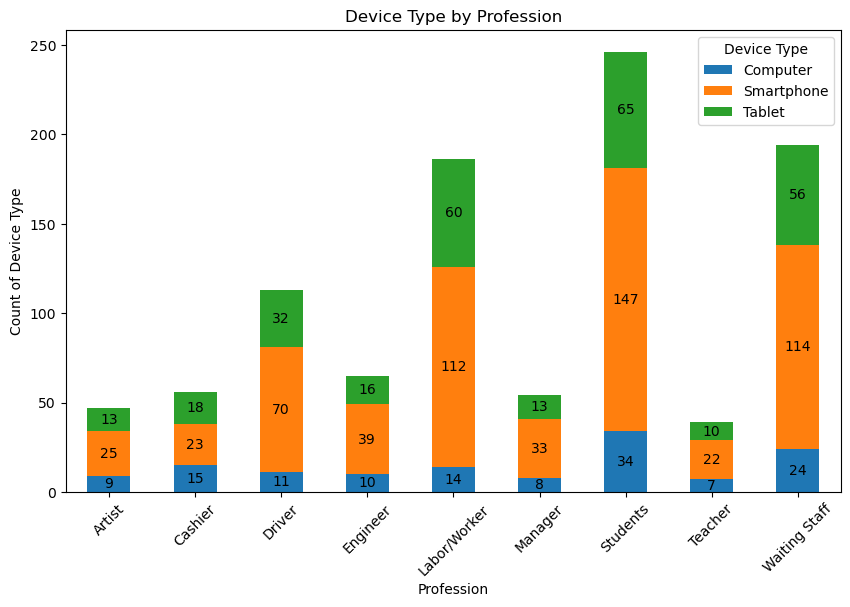

In [217]:
#profession by device type


#create stacked bar chart
ax = device_profession_counts_df.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.ylabel("Count of Device Type")
plt.xticks(rotation=45) 
plt.title("Device Type by Profession")

#add values on top of each category in the bar chart
for container in ax.containers:
    #add the labels for each segment of the bar
    ax.bar_label(container, label_type="center", fmt='%.0f')  # Center the labels within each section

plt.show()

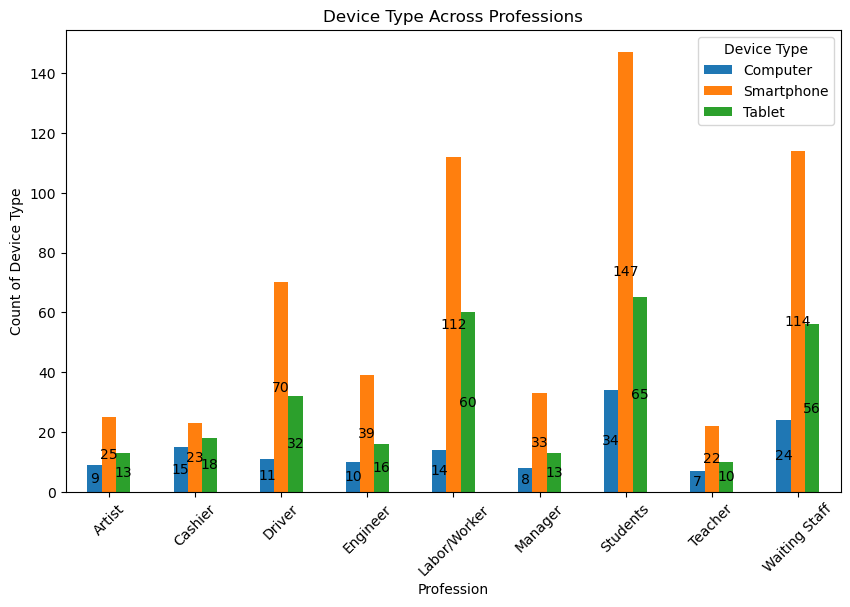

In [218]:
##############---USED
#profession by device type

#create bar chart
ax = device_profession_counts_df.plot(kind="bar", figsize=(10, 6))
plt.title("Device Type Across Professions")
plt.xlabel("Profession")
plt.ylabel("Count of Device Type")
plt.xticks(rotation=45) 
plt.legend(title="Device Type")

#add values on top of each category in the bar chart
for container in ax.containers:
    #add the labels for each segment of the bar
    ax.bar_label(container, label_type="center", fmt='%.0f')  # Center the labels within each section

plt.show()

In [219]:
#profession and location 

profession_location_df = cleaned_dataset_df.groupby(["Profession", "Location"]).size().unstack(fill_value=0)
profession_location_df

Location,Brazil,Germany,India,Indonesia,Japan,Mexico,Pakistan,Philippines,United States,Vietnam
Profession,,,,,,,,,,
Artist,5,2,7,7,3,5,2,3,9,4
Cashier,5,1,12,7,4,3,2,2,16,4
Driver,9,6,32,6,6,8,9,9,20,8
Engineer,6,4,14,6,7,7,4,6,7,4
Labor/Worker,18,8,42,17,14,13,8,21,29,16
Manager,4,2,9,4,5,6,4,4,8,8
Students,20,18,52,12,20,11,27,16,50,20
Teacher,2,2,16,4,2,3,2,2,4,2
Waiting Staff,9,16,44,14,14,17,18,15,31,16


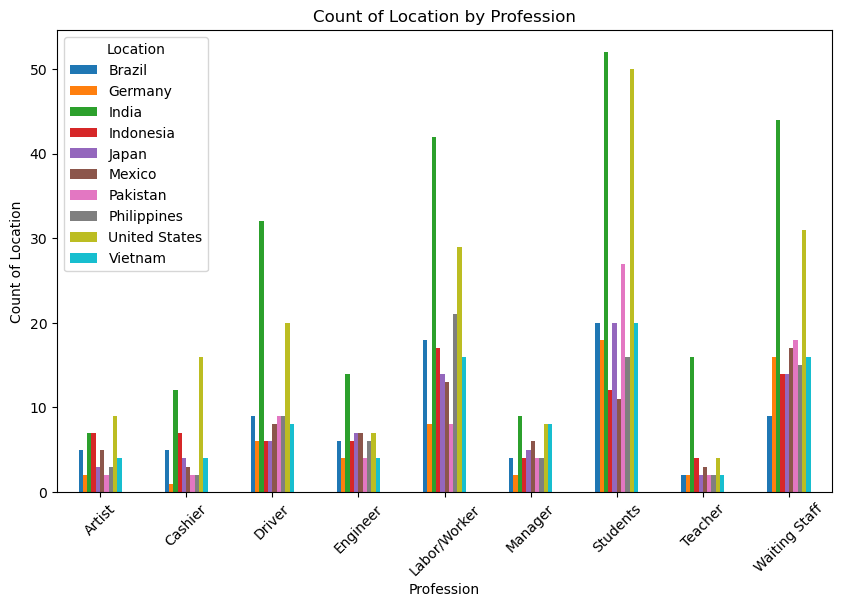

In [220]:
#profession and location 

#create bar chart
profession_location_df.plot(kind="bar", figsize=(10, 6))
plt.title("Count of Location by Profession")
plt.xlabel("Profession")
plt.ylabel("Count of Location")
plt.xticks(rotation=45) 
plt.legend(title="Location")
plt.show()


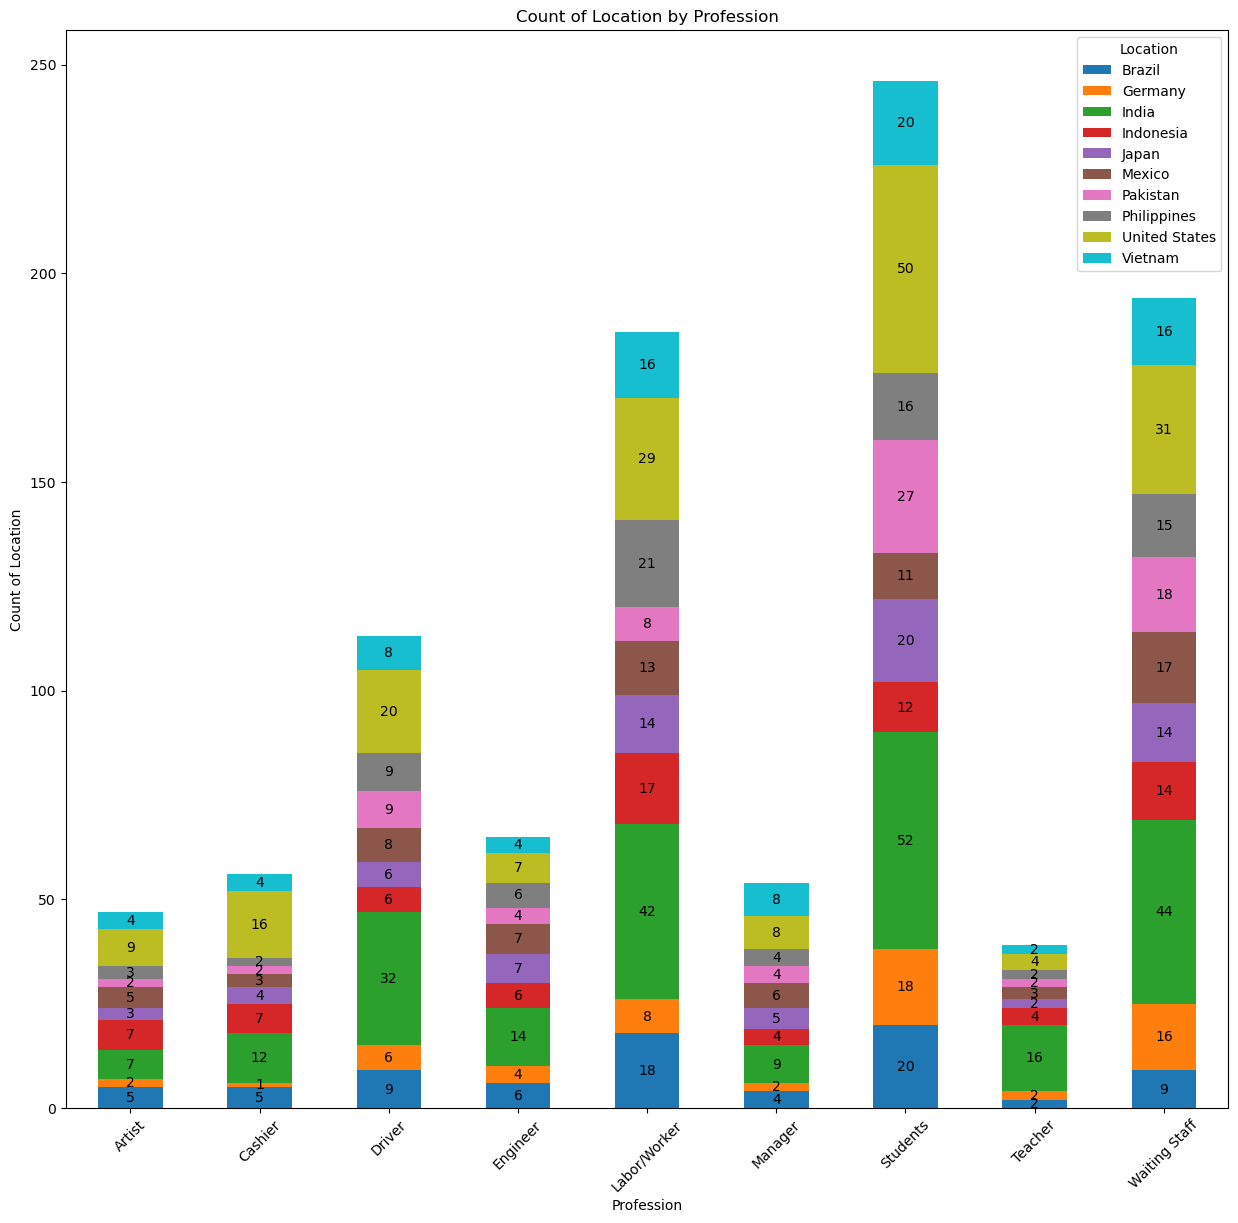

In [221]:
#profession and location 

#create stacked bar chart
ax = profession_location_df.plot(kind="bar", stacked=True, figsize=(15, 14))
plt.ylabel("Count of Location")
plt.xticks(rotation=45) 
plt.title("Count of Location by Profession")

#add values on top of each category in the bar chart
for container in ax.containers:
    #add the labels for each segment of the bar
    ax.bar_label(container, label_type="center", fmt='%.0f')  # Center the labels within each section

plt.show()

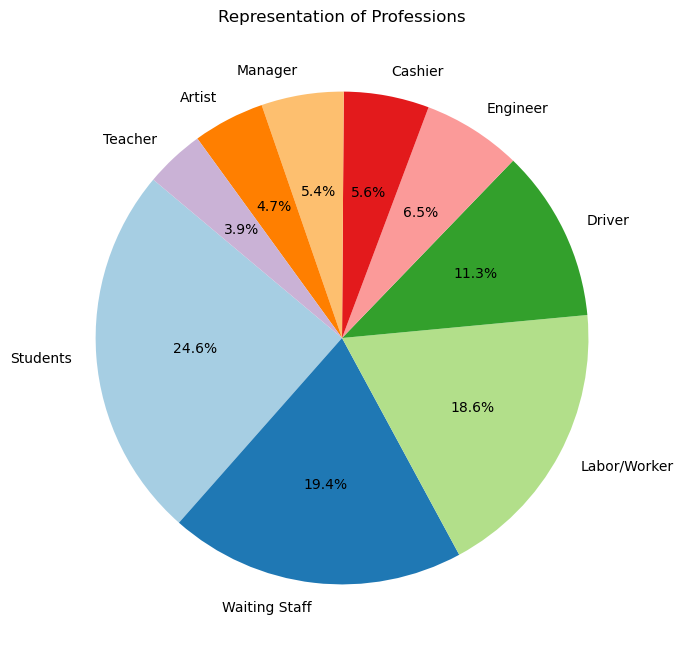

In [ ]:
##############---USED
profession_counts = cleaned_dataset_df['Profession'].value_counts()

#create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(profession_counts, labels=profession_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Representation of Professions")
plt.show()

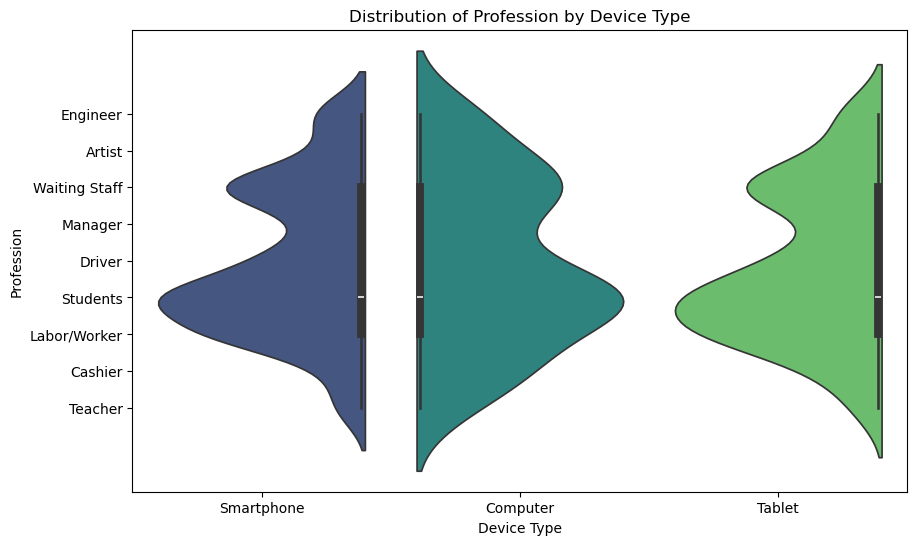

In [223]:
# Creating a violin plot to show the distribution of Productivity Loss by Device Type, with color hues representing Total Time Spent. 
plt.figure(figsize=(10, 6)) 
sns.violinplot( data=cleaned_dataset_df, x='Device Type', y='Profession', hue='Device Type', split=True, palette='viridis') 
plt.xlabel("Device Type") 
plt.ylabel("Profession") 
plt.title("Distribution of Profession by Device Type") 
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

## Is there a relationship between scroll rate and engagement level?

In [224]:
# Display the info in the dataframe
cleaned_dataset_df.describe()

,UserID,Age,Income,Total Time Spent,Number of Sessions,Video ID,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,ProductivityLoss,Satisfaction,Self Control,Addiction Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.986000,59524.213000,151.406000,10.013000,4891.738000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000,5.136000,4.864000,7.094000,2.906000
std,288.819436,13.497852,23736.212925,83.952637,5.380314,2853.144258,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798,2.122265,2.122265,2.058495,2.058495
min,1.000000,18.000000,20138.000000,10.000000,1.000000,11.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,250.750000,29.000000,38675.250000,78.000000,6.000000,2542.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000,3.000000,4.000000,5.000000,2.000000
50%,500.500000,42.000000,58805.000000,152.000000,10.000000,4720.500000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000,5.000000,5.000000,7.000000,3.000000
75%,750.250000,52.000000,79792.250000,223.000000,15.000000,7346.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000,6.000000,7.000000,8.000000,5.000000
max,1000.000000,64.000000,99676.000000,298.000000,19.000000,9997.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000,9.000000,9.000000,10.000000,7.000000


In [225]:
# Get the average scroll rate by device type
device_avg_scroll_rate = cleaned_dataset_df.groupby('Device Type')['Scroll Rate'].mean().round(1)
device_avg_scroll_rate

Device Type
Computer      48.5
Smartphone    49.9
Tablet        50.0
Name: Scroll Rate, dtype: float64

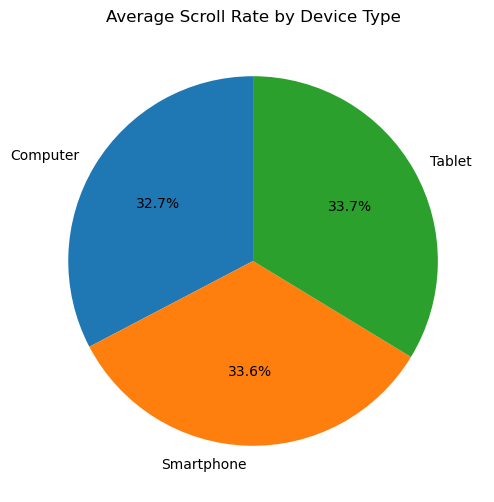

In [226]:
# Plot pie chart for avg scroll rate by device type
plt.figure(figsize=(10,6))
device_avg_scroll_rate.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Average Scroll Rate by Device Type')
plt.ylabel('')
plt.show()

In [227]:
# Get the average engagement level based off device type
device_engagement_lvl = cleaned_dataset_df.groupby('Device Type')['Engagement'].mean().round(1)
device_engagement_lvl

Device Type
Computer      5421.7
Smartphone    4903.0
Tablet        4993.8
Name: Engagement, dtype: float64

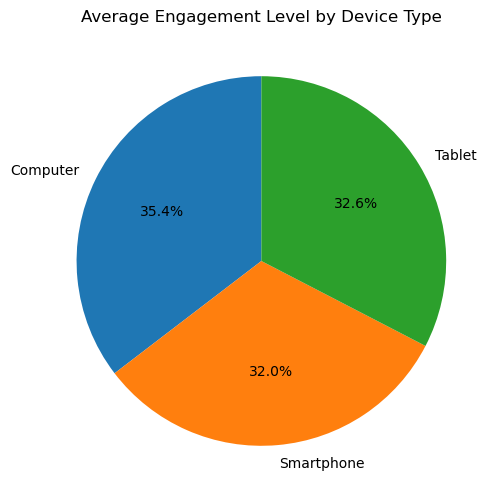

In [228]:
# Generate pie chart for average device engagement level
plt.figure(figsize=(10,6))
device_engagement_lvl.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Average Engagement Level by Device Type')
plt.ylabel('')
plt.show()

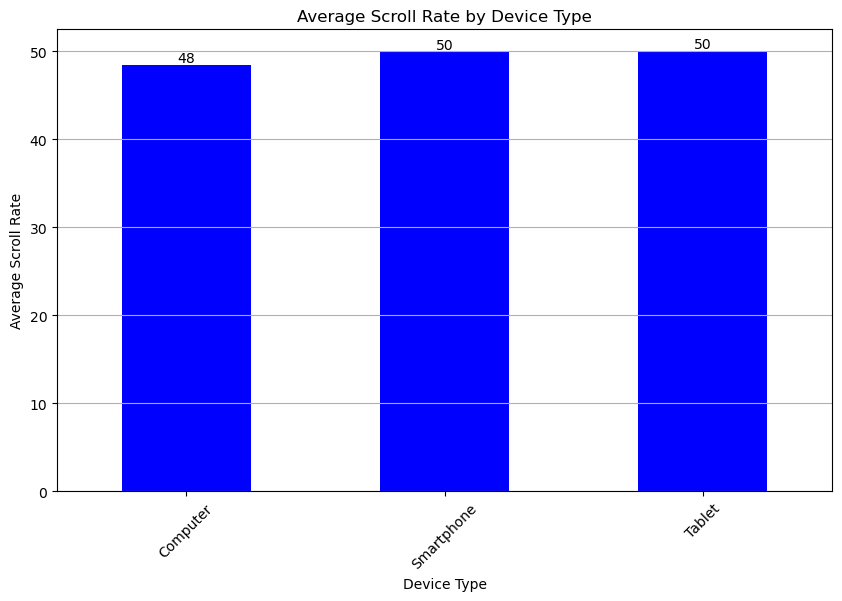

In [229]:
# Generate bar chart for average scroll rate by device type
plt.figure(figsize=(10,6))
ax = device_avg_scroll_rate.plot(kind='bar', color='blue', stacked=True)
plt.title("Average Scroll Rate by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Average Scroll Rate")
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%.0f')
    
plt.show()

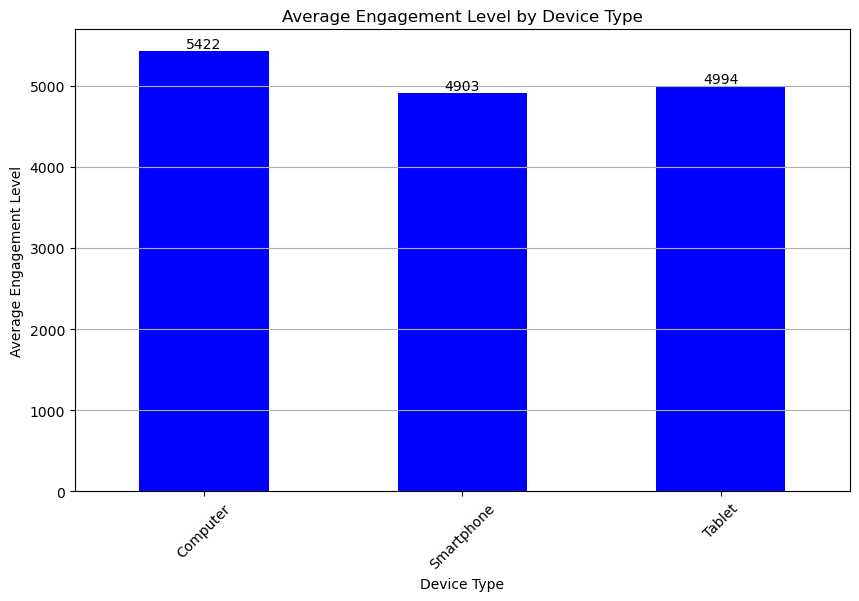

In [230]:
# Generate bar chart for average engagement level by device type
plt.figure(figsize=(10,6))
ax = device_engagement_lvl.plot(kind='bar', stacked=True, color='blue')
plt.title("Average Engagement Level by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Average Engagement Level")
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%.0f')
    
plt.show()

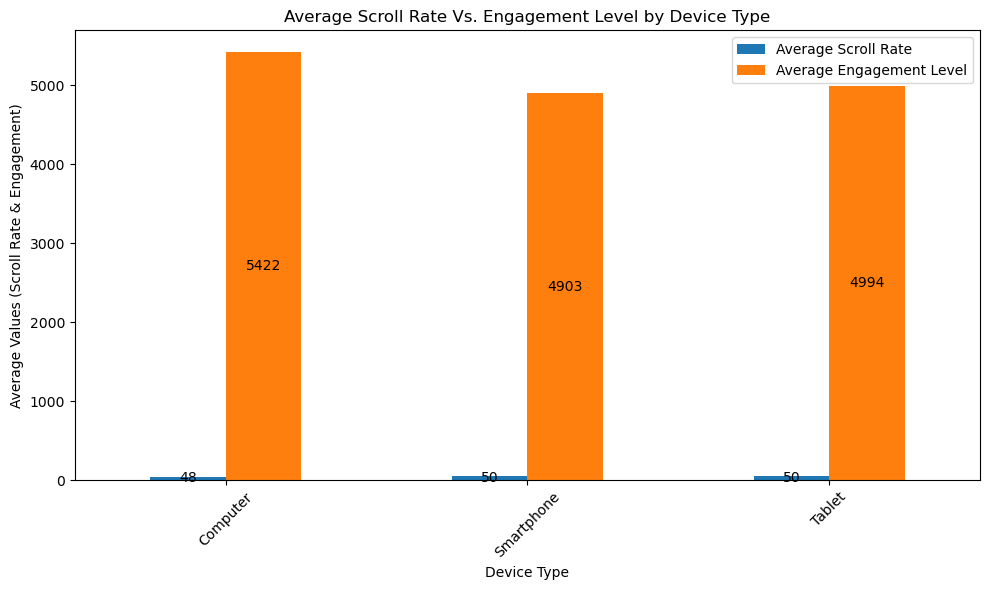

In [231]:
# Generate grouped bar chart for average scroll rate vs. average engagement level by device type

# Create a new dataframe with the averages
avg_df = pd.DataFrame({'Average Scroll Rate': device_avg_scroll_rate,
                       'Average Engagement Level': device_engagement_lvl
                       })
bar_width = 0.35

# Generate chart
ax = avg_df.plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Average Scroll Rate Vs. Engagement Level by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Average Values (Scroll Rate & Engagement)')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.0f')
    
plt.show()

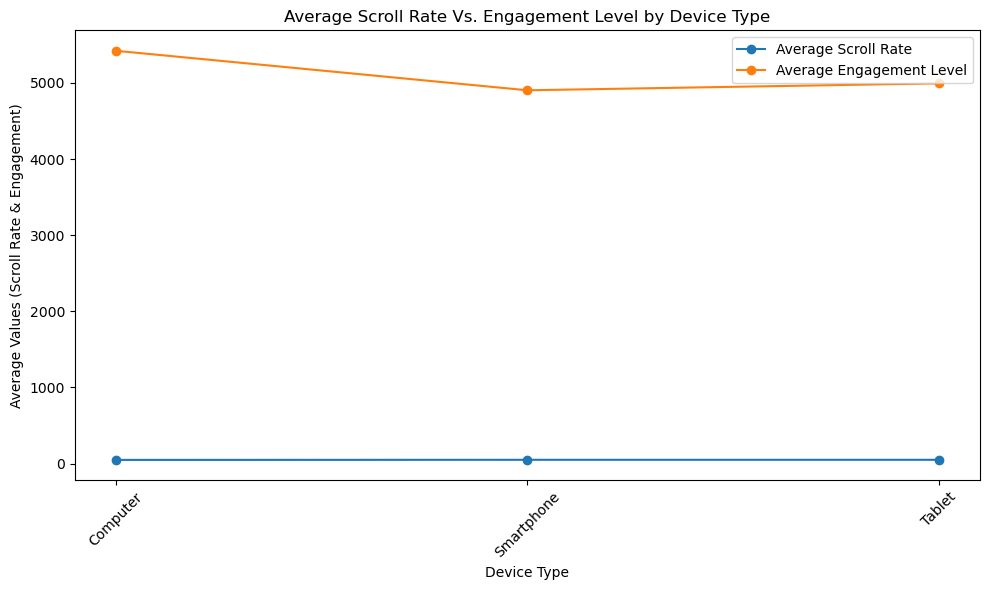

In [232]:
# Generate line chart for average scroll rate vs. average engagement level by device type
avg_df = pd.DataFrame({'Device Type': device_avg_scroll_rate.index,
                        'Average Scroll Rate': device_avg_scroll_rate,
                       'Average Engagement Level': device_engagement_lvl
                       })

avg_df.set_index('Device Type', inplace=True)

plt.figure(figsize=(10,6))
plt.plot(avg_df.index, avg_df['Average Scroll Rate'], marker='o', label='Average Scroll Rate')
plt.plot(avg_df.index, avg_df['Average Engagement Level'], marker='o', label='Average Engagement Level')
plt.title('Average Scroll Rate Vs. Engagement Level by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Average Values (Scroll Rate & Engagement)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [233]:
# Calculate the correlation coefficient
correlation_coeff = stats.pearsonr(cleaned_dataset_df['Scroll Rate'], cleaned_dataset_df['Engagement'])

In [234]:
# Perform linear regression
slope, intercept, r_value, p_value, stderr = stats.linregress(cleaned_dataset_df['Scroll Rate'], cleaned_dataset_df['Engagement'])

# Fit ilnear regression
regression_equation = slope * cleaned_dataset_df['Scroll Rate'] + intercept

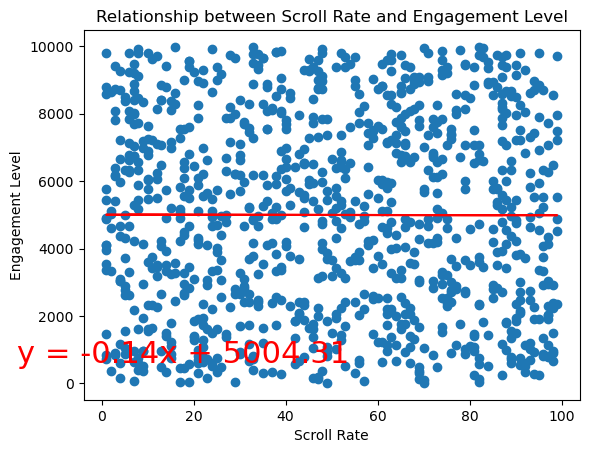

Correlation Coefficient: PearsonRResult(statistic=-0.0014412806711375228, pvalue=0.9636925819254766)


In [235]:
# Plot the data
plt.scatter(cleaned_dataset_df['Scroll Rate'], cleaned_dataset_df['Engagement'], label='Data Points')
plt.plot(cleaned_dataset_df['Scroll Rate'], regression_equation, color='red', label='Regression Line')
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (0.2, 0.1), fontsize=22, color='red', xycoords='axes fraction', ha='center')
plt.xlabel('Scroll Rate')
plt.ylabel('Engagement Level')
plt.title('Relationship between Scroll Rate and Engagement Level')
plt.show()
print(f"Correlation Coefficient: {correlation_coeff}")

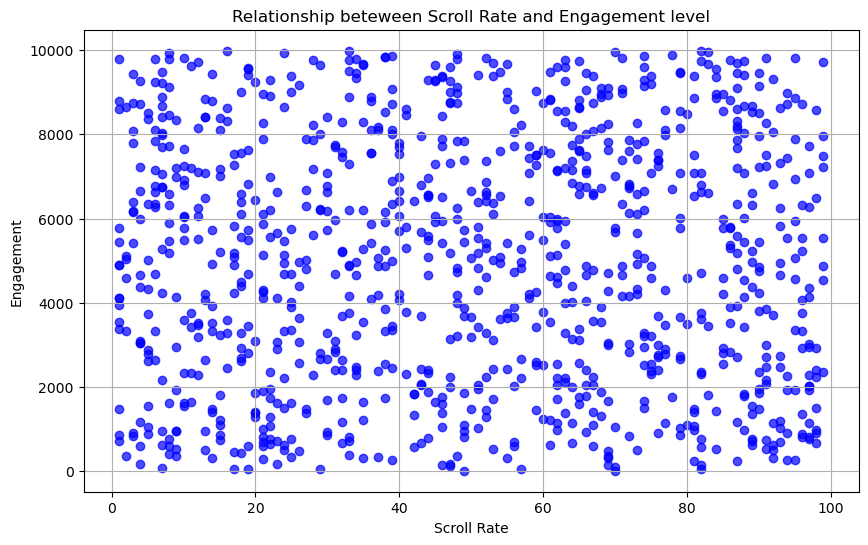

In [236]:
# Generate scatter plot to show the relationship between scroll rate and engagement level
plt.figure(figsize=(10,6))
plt.scatter(cleaned_dataset_df['Scroll Rate'], cleaned_dataset_df['Engagement'], color="blue", alpha=0.7)
plt.title("Relationship beteween Scroll Rate and Engagement level")
plt.xlabel("Scroll Rate")
plt.ylabel("Engagement")
plt.grid(True)
plt.show()

## Does the type of device impact productivity loss?


In [237]:
# create dataframe
darkside_df = pd.read_csv(file_to_load)

# Display results
darkside_df

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,Device Type,OS,Watch Time,Self Control,Addiction Level,Current Activity,Connection Type
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Brazil,62963,True,False,Waiting Staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,22,Male,India,74254,True,True,Students,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,5:45 PM,10,0,At work,Mobile Data
996,997,40,Female,Pakistan,27006,False,False,Waiting Staff,Urban,Facebook,...,8,2,Boredom,Smartphone,MacOS,10:15 PM,10,0,At home,Mobile Data
997,998,27,Male,India,94218,True,True,Waiting Staff,Rural,TikTok,...,9,1,Procrastination,Smartphone,iOS,10:15 PM,10,0,Commuting,Mobile Data
998,999,61,Male,Pakistan,85344,True,False,Students,Urban,YouTube,...,3,7,Procrastination,Smartphone,MacOS,10:15 PM,5,5,At work,Wi-Fi


In [238]:
# check the columns in the dataset
print(darkside_df.columns)

Index(['UserID', 'Age', 'Gender', 'Location', 'Income', 'Debt',
       'Owns Property', 'Profession', 'Demographics', 'Platform',
       'Total Time Spent', 'Number of Sessions', 'Video ID', 'Video Category',
       'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video',
       'Number of Videos Watched', 'Scroll Rate', 'Frequency',
       'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'Device Type', 'OS',
       'Watch Time', 'Self Control', 'Addiction Level', 'Current Activity',
       'Connection Type'],
      dtype='object')


In [239]:
#Display basic information about ProductivityLoss Column

print(darkside_df['ProductivityLoss'].describe())

count    1000.000000
mean        5.136000
std         2.122265
min         1.000000
25%         3.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: ProductivityLoss, dtype: float64


In [240]:
# Display basic information about Device Type Column
print(darkside_df['Device Type'].describe)

<bound method NDFrame.describe of 0      Smartphone
1        Computer
2          Tablet
3      Smartphone
4      Smartphone
          ...    
995    Smartphone
996    Smartphone
997    Smartphone
998    Smartphone
999    Smartphone
Name: Device Type, Length: 1000, dtype: object>


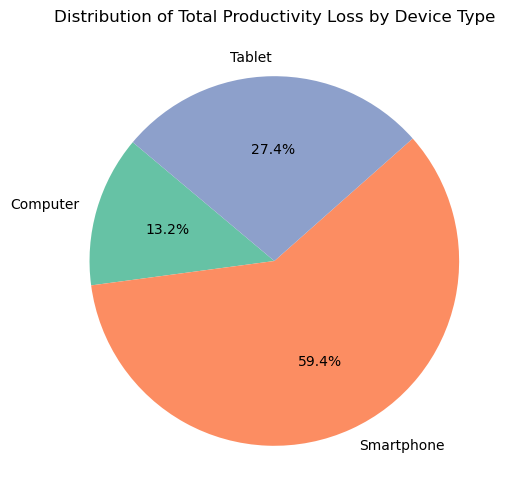

In [241]:
# Calculate the total productivity loss by device type
device_productivity_sum = darkside_df.groupby('Device Type')['ProductivityLoss'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(device_productivity_sum, labels=device_productivity_sum.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Distribution of Total Productivity Loss by Device Type')
plt.show()

In [242]:
#Group by Device Type Measurements 
device_productivity_avg = darkside_df.groupby('Device Type')['ProductivityLoss'].mean()
device_productivity_avg

Device Type
Computer      5.143939
Smartphone    5.217094
Tablet        4.964664
Name: ProductivityLoss, dtype: float64

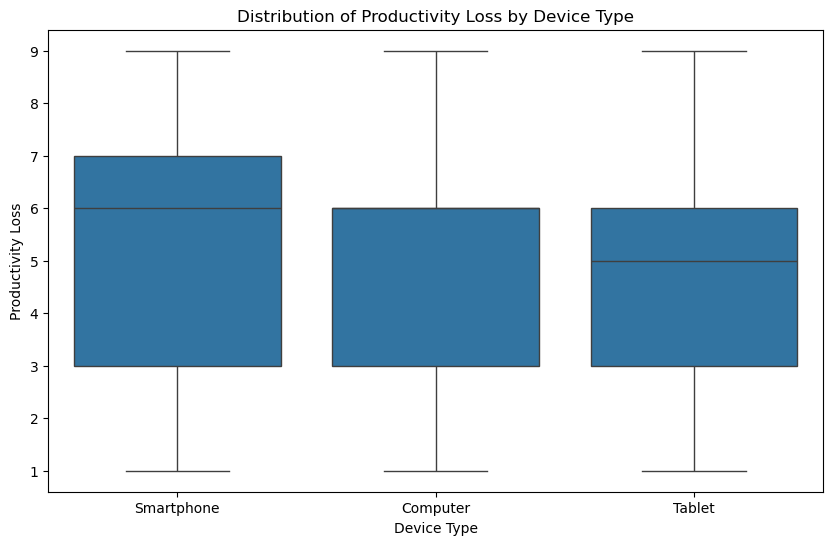

In [243]:
# Create box plot with the data
plt.figure(figsize=(10, 6))
sns.boxplot(x='Device Type', y='ProductivityLoss', data=darkside_df)
plt.xlabel('Device Type')
plt.ylabel('Productivity Loss')
plt.title('Distribution of Productivity Loss by Device Type')
plt.show()

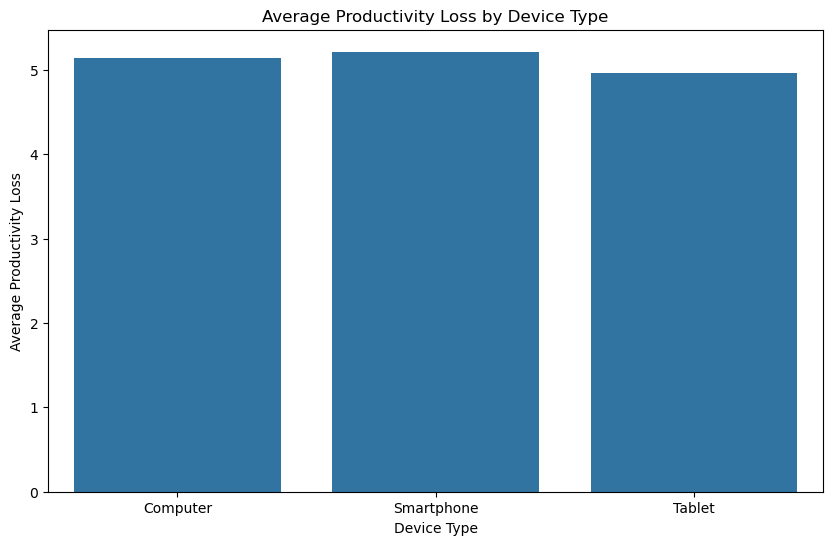

In [244]:
#create bar plot with averages
plt.figure(figsize=(10, 6))
sns.barplot(x=device_productivity_avg.index, y=device_productivity_avg.values)
plt.xlabel('Device Type')
plt.ylabel('Average Productivity Loss')
plt.title('Average Productivity Loss by Device Type')
plt.show()

In [245]:
# Calculate the average productivity loss by device type and location
# Group the data by 'Device Type' and 'Location', then take the mean of 'ProductivityLoss' for each group
# Reset the index

device_location_productivity = darkside_df.groupby(['Device Type', 'Location'])['ProductivityLoss'].mean().reset_index()

device_location_productivity

,Device Type,Location,ProductivityLoss
0,Computer,Brazil,5.200000
1,Computer,Germany,6.000000
2,Computer,India,5.192308
3,Computer,Indonesia,5.105263
4,Computer,Japan,4.857143
5,Computer,Mexico,5.153846
6,Computer,Pakistan,4.600000
7,Computer,Philippines,5.900000
8,Computer,United States,4.695652
9,Computer,Vietnam,5.750000


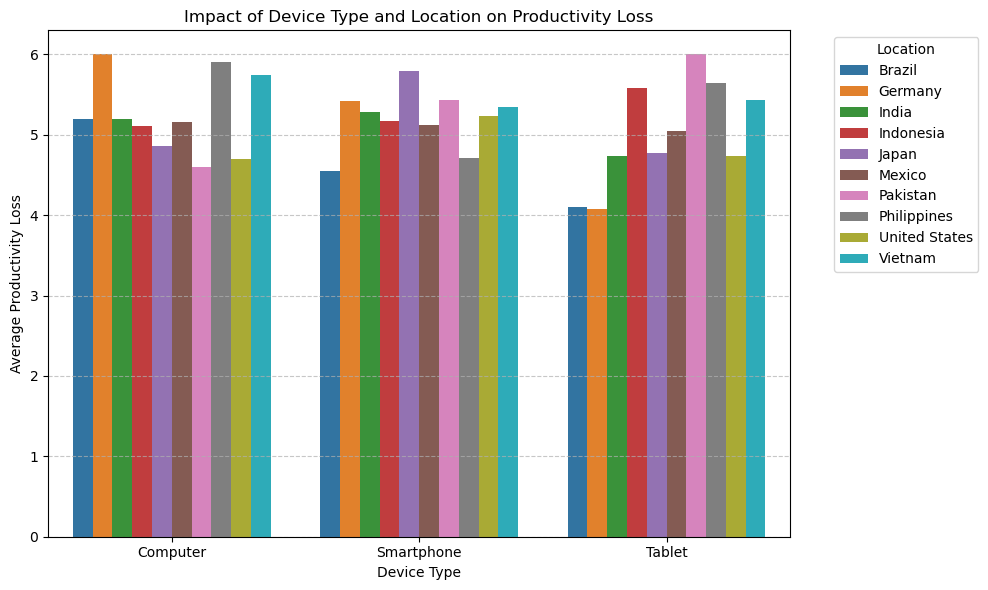

In [246]:
# Create bar plot with averages
plt.figure(figsize=(10, 6))
sns.barplot(x='Device Type', y= 'ProductivityLoss', hue='Location', data=device_location_productivity)
plt.xlabel('Device Type')
plt.ylabel('Average Productivity Loss')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Impact of Device Type and Location on Productivity Loss')
plt.tight_layout()
plt.show()

In [247]:
#Group by Device Type by Profession
# Calculate the average productivity loss by device type and profession
# Group the data by 'Device Type' and 'Profession', then take the mean of 'ProductivityLoss' for each group
# Print the result


device_profession_productivity = darkside_df.groupby(['Device Type', 'Profession'])['ProductivityLoss'].mean()
device_profession_productivity

Device Type  Profession   
Computer     Artist           5.111111
             Cashier          5.733333
             Driver           4.727273
             Engineer         4.900000
             Labor/Worker     5.214286
             Manager          4.875000
             Students         4.882353
             Teacher          5.428571
             Waiting Staff    5.416667
Smartphone   Artist           5.520000
             Cashier          4.913043
             Driver           5.171429
             Engineer         5.256410
             Labor/Worker     5.267857
             Manager          5.000000
             Students         5.047619
             Teacher          5.318182
             Waiting Staff    5.438596
Tablet       Artist           4.846154
             Cashier          5.055556
             Driver           4.687500
             Engineer         5.000000
             Labor/Worker     4.900000
             Manager          5.230769
             Students         5.06153

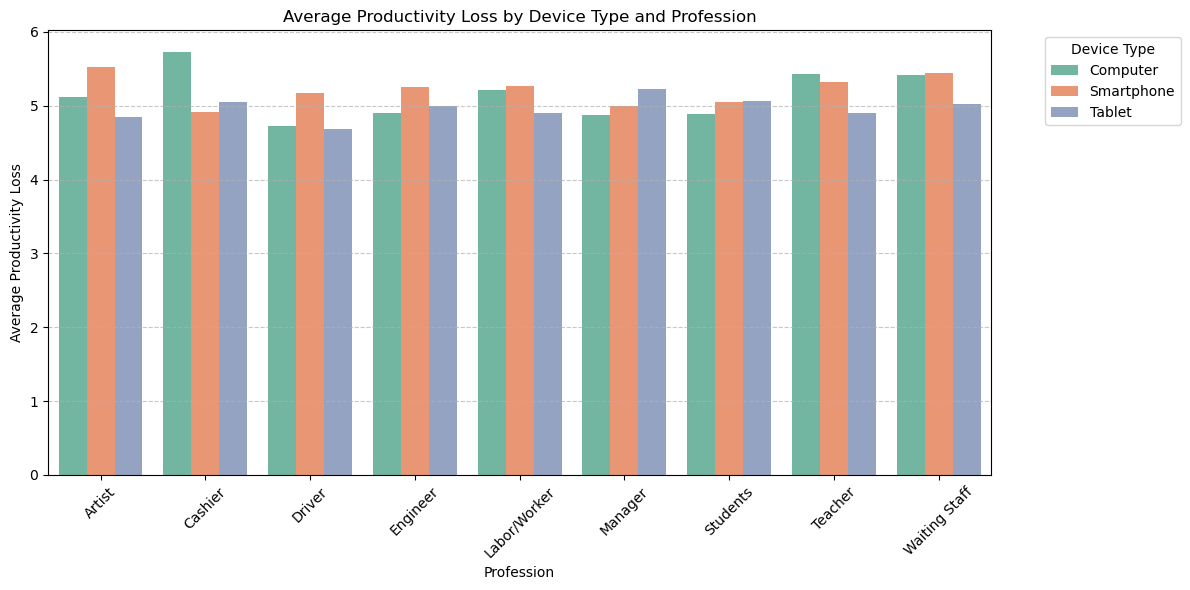

In [248]:
# Reset the index
device_profession_productivity = device_profession_productivity.reset_index()

# Display a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=device_profession_productivity, x="Profession", y="ProductivityLoss", hue="Device Type", palette="Set2")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel("Profession")
plt.ylabel("Average Productivity Loss")
plt.title("Average Productivity Loss by Device Type and Profession")
plt.legend(title="Device Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

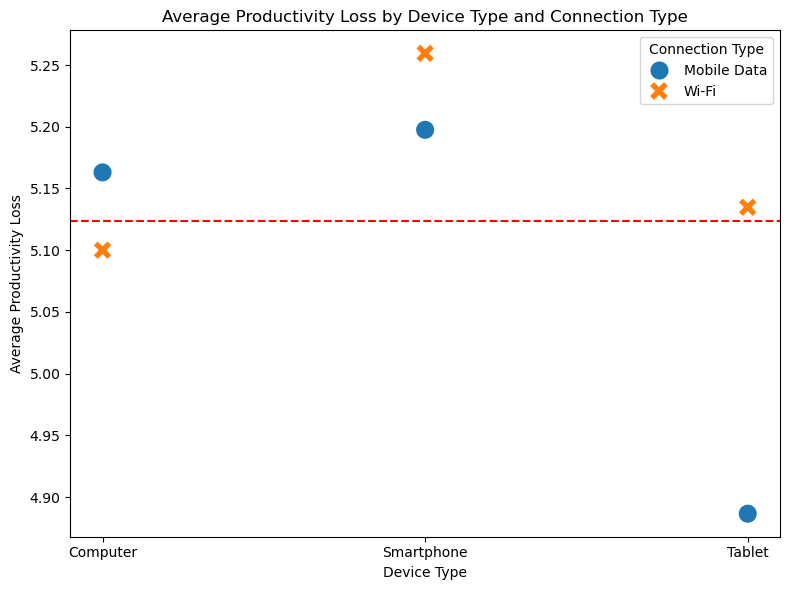

In [249]:
#Group by Device Type by Connection Type
# Calculate the average productivity loss by device type and connection type
# Group the data by 'Device Type' and 'Connection Type', then take the mean of 'ProductivityLoss' for each group

device_connection_productivity = darkside_df.groupby(['Device Type', 'Connection Type'])['ProductivityLoss'].mean()

# Calculate the overall mean productivity loss for the annotation line
mean_productivity_loss = device_connection_productivity.mean()

# Reset the index to make 'Device Type' and 'Connection Type' columns
device_connection_productivity = device_connection_productivity.reset_index()

# Scatter plot with Device Type on x-axis, Productivity Loss on y-axis, and Connection Type as color
plt.figure(figsize=(8, 6))
sns.scatterplot(data=device_connection_productivity, x='Device Type', y='ProductivityLoss', hue='Connection Type', style='Connection Type', s=200)
plt.xlabel('Device Type')
plt.ylabel('Average Productivity Loss')
plt.title("Average Productivity Loss by Device Type and Connection Type")
plt.legend(title="Connection Type")
plt.axhline(y=mean_productivity_loss, color='red', linestyle='--', linewidth=1.5, label=f'Average Productivity Loss ({mean_productivity_loss:.2f})')
plt.tight_layout()
plt.show()

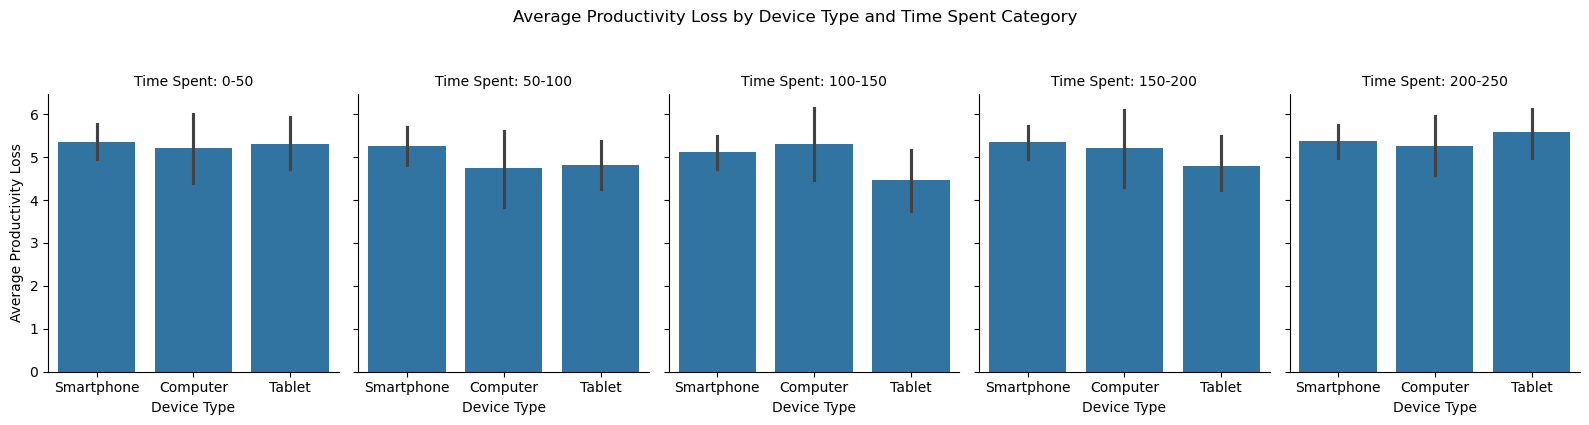

In [250]:
# Defining time spent categories
darkside_df['TimeSpentCategory'] = pd.cut(darkside_df['Total Time Spent'], bins=[0, 50, 100, 150, 200, 250], labels=['0-50', '50-100', '100-150', '150-200', '200-250'])

# Creating a FacetGrid with bar plots for each time spent category
g = sns.FacetGrid(darkside_df, col="TimeSpentCategory", height=4, aspect=0.8)
g.map(sns.barplot, "Device Type", "ProductivityLoss", order=['Smartphone', 'Computer', 'Tablet'])

g.set_axis_labels("Device Type", "Average Productivity Loss")
g.set_titles("Time Spent: {col_name}")
plt.suptitle("Average Productivity Loss by Device Type and Time Spent Category", y=1.05)
plt.tight_layout()
plt.show()